In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sn

In [2]:
import requests
import json

In [3]:
#Open json files
champ = open('data/champion.json')
champ1 = open('data/champion_info.json')
champ2 = open('data/champion_info_2.json')

In [4]:
#Read in json file
data = json.load(champ)
data1 = json.load(champ1)
data2 = json.load(champ2)
champion_dict = {}
champion_diff = {}
champion_stats = {}

In [5]:
data

{'type': 'champion',
 'format': 'standAloneComplex',
 'version': '10.14.1',
 'data': {'Aatrox': {'version': '10.14.1',
   'id': 'Aatrox',
   'key': '266',
   'name': 'Aatrox',
   'title': 'the Darkin Blade',
   'blurb': 'Once honored defenders of Shurima against the Void, Aatrox and his brethren would eventually become an even greater threat to Runeterra, and were defeated only by cunning mortal sorcery. But after centuries of imprisonment, Aatrox was the first to find...',
   'info': {'attack': 8, 'defense': 4, 'magic': 3, 'difficulty': 4},
   'image': {'full': 'Aatrox.png',
    'sprite': 'champion0.png',
    'group': 'champion',
    'x': 0,
    'y': 0,
    'w': 48,
    'h': 48},
   'tags': ['Fighter', 'Tank'],
   'partype': 'Blood Well',
   'stats': {'hp': 580,
    'hpperlevel': 90,
    'mp': 0,
    'mpperlevel': 0,
    'movespeed': 345,
    'armor': 38,
    'armorperlevel': 3.25,
    'spellblock': 32.1,
    'spellblockperlevel': 1.25,
    'attackrange': 175,
    'hpregen': 3,
    'h

In [6]:
df=pd.read_json('data/champion.json')

In [7]:
list(data['data'].keys())[0]

'Aatrox'

In [8]:
df['data'][0]['id']

'Aatrox'

In [9]:
df.index

Index(['Aatrox', 'Ahri', 'Akali', 'Alistar', 'Amumu', 'Anivia', 'Annie',
       'Aphelios', 'Ashe', 'AurelionSol',
       ...
       'XinZhao', 'Yasuo', 'Yorick', 'Yuumi', 'Zac', 'Zed', 'Ziggs', 'Zilean',
       'Zoe', 'Zyra'],
      dtype='object', length=148)

In [10]:
data['data']

{'Aatrox': {'version': '10.14.1',
  'id': 'Aatrox',
  'key': '266',
  'name': 'Aatrox',
  'title': 'the Darkin Blade',
  'blurb': 'Once honored defenders of Shurima against the Void, Aatrox and his brethren would eventually become an even greater threat to Runeterra, and were defeated only by cunning mortal sorcery. But after centuries of imprisonment, Aatrox was the first to find...',
  'info': {'attack': 8, 'defense': 4, 'magic': 3, 'difficulty': 4},
  'image': {'full': 'Aatrox.png',
   'sprite': 'champion0.png',
   'group': 'champion',
   'x': 0,
   'y': 0,
   'w': 48,
   'h': 48},
  'tags': ['Fighter', 'Tank'],
  'partype': 'Blood Well',
  'stats': {'hp': 580,
   'hpperlevel': 90,
   'mp': 0,
   'mpperlevel': 0,
   'movespeed': 345,
   'armor': 38,
   'armorperlevel': 3.25,
   'spellblock': 32.1,
   'spellblockperlevel': 1.25,
   'attackrange': 175,
   'hpregen': 3,
   'hpregenperlevel': 1,
   'mpregen': 0,
   'mpregenperlevel': 0,
   'crit': 0,
   'critperlevel': 0,
   'attackdama

In [11]:
df['data'][df.index[0]]['key']

'266'

In [12]:
for k, item in enumerate(df.index):
    champion_dict[df['data'][k]['id']] = df['data'][item]['key']

In [13]:
#Dictionary of champions & their corresponding code
champion_dict

{'Aatrox': '266',
 'Ahri': '103',
 'Akali': '84',
 'Alistar': '12',
 'Amumu': '32',
 'Anivia': '34',
 'Annie': '1',
 'Aphelios': '523',
 'Ashe': '22',
 'AurelionSol': '136',
 'Azir': '268',
 'Bard': '432',
 'Blitzcrank': '53',
 'Brand': '63',
 'Braum': '201',
 'Caitlyn': '51',
 'Camille': '164',
 'Cassiopeia': '69',
 'Chogath': '31',
 'Corki': '42',
 'Darius': '122',
 'Diana': '131',
 'DrMundo': '36',
 'Draven': '119',
 'Ekko': '245',
 'Elise': '60',
 'Evelynn': '28',
 'Ezreal': '81',
 'Fiddlesticks': '9',
 'Fiora': '114',
 'Fizz': '105',
 'Galio': '3',
 'Gangplank': '41',
 'Garen': '86',
 'Gnar': '150',
 'Gragas': '79',
 'Graves': '104',
 'Hecarim': '120',
 'Heimerdinger': '74',
 'Illaoi': '420',
 'Irelia': '39',
 'Ivern': '427',
 'Janna': '40',
 'JarvanIV': '59',
 'Jax': '24',
 'Jayce': '126',
 'Jhin': '202',
 'Jinx': '222',
 'Kaisa': '145',
 'Kalista': '429',
 'Karma': '43',
 'Karthus': '30',
 'Kassadin': '38',
 'Katarina': '55',
 'Kayle': '10',
 'Kayn': '141',
 'Kennen': '85',
 'Kh

In [14]:
for k, item in enumerate(df.index):
    champion_diff[df['data'][k]['id']] = df['data'][item]['info']

In [15]:
champion_diff

{'Aatrox': {'attack': 8, 'defense': 4, 'magic': 3, 'difficulty': 4},
 'Ahri': {'attack': 3, 'defense': 4, 'magic': 8, 'difficulty': 5},
 'Akali': {'attack': 5, 'defense': 3, 'magic': 8, 'difficulty': 7},
 'Alistar': {'attack': 6, 'defense': 9, 'magic': 5, 'difficulty': 7},
 'Amumu': {'attack': 2, 'defense': 6, 'magic': 8, 'difficulty': 3},
 'Anivia': {'attack': 1, 'defense': 4, 'magic': 10, 'difficulty': 10},
 'Annie': {'attack': 2, 'defense': 3, 'magic': 10, 'difficulty': 6},
 'Aphelios': {'attack': 6, 'defense': 2, 'magic': 1, 'difficulty': 10},
 'Ashe': {'attack': 7, 'defense': 3, 'magic': 2, 'difficulty': 4},
 'AurelionSol': {'attack': 2, 'defense': 3, 'magic': 8, 'difficulty': 7},
 'Azir': {'attack': 6, 'defense': 3, 'magic': 8, 'difficulty': 9},
 'Bard': {'attack': 4, 'defense': 4, 'magic': 5, 'difficulty': 9},
 'Blitzcrank': {'attack': 4, 'defense': 8, 'magic': 5, 'difficulty': 4},
 'Brand': {'attack': 2, 'defense': 2, 'magic': 9, 'difficulty': 4},
 'Braum': {'attack': 3, 'defen

In [16]:
for k, item in enumerate(df.index):
    champion_stats[df['data'][k]['id']] = df['data'][item]['stats']

In [17]:
champion_stats

{'Aatrox': {'hp': 580,
  'hpperlevel': 90,
  'mp': 0,
  'mpperlevel': 0,
  'movespeed': 345,
  'armor': 38,
  'armorperlevel': 3.25,
  'spellblock': 32.1,
  'spellblockperlevel': 1.25,
  'attackrange': 175,
  'hpregen': 3,
  'hpregenperlevel': 1,
  'mpregen': 0,
  'mpregenperlevel': 0,
  'crit': 0,
  'critperlevel': 0,
  'attackdamage': 60,
  'attackdamageperlevel': 5,
  'attackspeedperlevel': 2.5,
  'attackspeed': 0.651},
 'Ahri': {'hp': 526,
  'hpperlevel': 92,
  'mp': 418,
  'mpperlevel': 25,
  'movespeed': 330,
  'armor': 20.88,
  'armorperlevel': 3.5,
  'spellblock': 30,
  'spellblockperlevel': 0.5,
  'attackrange': 550,
  'hpregen': 6.5,
  'hpregenperlevel': 0.6000000000000001,
  'mpregen': 8,
  'mpregenperlevel': 0.8,
  'crit': 0,
  'critperlevel': 0,
  'attackdamage': 53.04,
  'attackdamageperlevel': 3,
  'attackspeedperlevel': 2,
  'attackspeed': 0.668},
 'Akali': {'hp': 575,
  'hpperlevel': 95,
  'mp': 200,
  'mpperlevel': 0,
  'movespeed': 345,
  'armor': 23,
  'armorperleve

In [18]:
ew = pd.DataFrame(champion_dict.items(), columns = ['Champion', 'Code'])

In [19]:
aa = pd.DataFrame(champion_diff.items(), columns = ['Champion', 'Info'])

In [20]:
bb = pd.DataFrame(champion_stats.items(), columns = ['Champion', 'Stats'])

In [21]:
bb

,Champion,Stats
0,Aatrox,"{'hp': 580, 'hpperlevel': 90, 'mp': 0, 'mpperl..."
1,Ahri,"{'hp': 526, 'hpperlevel': 92, 'mp': 418, 'mppe..."
2,Akali,"{'hp': 575, 'hpperlevel': 95, 'mp': 200, 'mppe..."
3,Alistar,"{'hp': 600, 'hpperlevel': 106, 'mp': 350, 'mpp..."
4,Amumu,"{'hp': 613.12, 'hpperlevel': 84, 'mp': 287.2, ..."
...,...,...
143,Zed,"{'hp': 584, 'hpperlevel': 85, 'mp': 200, 'mppe..."
144,Ziggs,"{'hp': 536, 'hpperlevel': 92, 'mp': 480, 'mppe..."
145,Zilean,"{'hp': 504, 'hpperlevel': 82, 'mp': 452, 'mppe..."
146,Zoe,"{'hp': 560, 'hpperlevel': 92, 'mp': 425, 'mppe..."


In [22]:
data['data'][list(data['data'].keys())[0]]['key']

'266'

In [23]:
#Might get updated data from Riot Games website(API) - season 10
requests.get('https://na1.api.riotgames.com/lol/platform/v3/champion-rotations?api_key=RGAPI-916fc650-2890-457d-aada-2686e5cfca85')

<Response [403]>

In [24]:
response = requests.get('https://na1.api.riotgames.com/lol/platform/v3/champion-rotations?api_key=RGAPI-916fc650-2890-457d-aada-2686e5cfca85')

response.json()

{'status': {'message': 'Forbidden', 'status_code': 403}}

In [25]:
dfr = pd.read_csv('data/games.csv')

In [26]:
dfr

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


In [27]:
dfr.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [28]:
#input champion's name & their level of difficultly from json file data
dfr[['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id','t2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id']]

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,8,432,96,11,112,104,498,122,238,412
1,119,39,76,10,35,54,25,120,157,92
2,18,141,267,68,38,69,412,126,24,22
3,57,63,29,61,36,90,19,412,92,22
4,19,29,40,119,134,37,59,141,38,51
...,...,...,...,...,...,...,...,...,...,...
51485,19,429,91,432,64,45,83,67,40,79
51486,90,32,31,412,18,102,429,89,75,45
51487,141,18,432,81,68,1,119,33,43,99
51488,121,236,420,201,99,21,56,25,30,11


In [29]:
new_dfr=dfr.rename(columns={'gameId' : 'Game_ID', 'creationTime': 'Creation_Time', 'gameDuration':'Game_Duration',
                    'seasonId':'Season_ID', 'winner': 'Team_Won',
                    'firstBlood':'First_Blood', 'firstTower':'First_Tower', 'firstInhibitor':'First_Inhibitor',
                    'firstBaron': 'First_Baron','firstDragon':'First_Dragon', 'firstRiftHerald':'First_Rift_Herald',
                    't1_champ1id':'Team1_Champion1_ID', 't1_champ1_sum1':'TEAM1_CHAMPION1_SUMMONER_SPELL1',
                    't1_champ1_sum2':'TEAM1_CHAMPION1_SUMMONER_SPELL2', 't1_champ2id':'Team1_Champion2_ID',
                    't1_champ2_sum1':'TEAM1_CHAMPION2_SUMMONER_SPELL1', 't1_champ2_sum2':'TEAM1_CHAMPION2_SUMMONER_SPELL2',
                    't1_champ3id':'Team1_Champion3_ID', 't1_champ3_sum1':'TEAM1_CHAMPION3_SUMMONER_SPELL1',
                    't1_champ3_sum2':'TEAM1_CHAMPION3_SUMMONER_SPELL2',
                    't1_champ4id':'Team1_Champion4_ID',
                    't1_champ4_sum1':'TEAM1_CHAMPION4_SUMMONER_SPELL1', 't1_champ4_sum2':'TEAM1_CHAMPION4_SUMMONER_SPELL2',
                    't1_champ5id':'Team1_Champion5_ID', 't1_champ5_sum1':'TEAM1_CHAMPION5_SUMMONER_SPELL1',
                    't1_champ5_sum2':'TEAM1_CHAMPION5_SUMMONER_SPELL2', 't1_towerKills':'Team1_Towers_Taken',
                    't1_inhibitorKills':'Team1_Inibitors_Taken', 't1_baronKills':'Team1_Barons_Taken',
                    't1_dragonKills':'Team1_Dragon_Kills', 't1_riftHeraldKills':'Team1_RiftHerald_Kills',
                    't1_ban1': 'TEAM_1_banned_champion1', 
                    't1_ban2': 'TEAM_1_banned_champion2', 't1_ban3': 'TEAM_1_banned_champion3',
                    't1_ban4': 'TEAM_1_banned_champion4', 't1_ban5': 'TEAM_1_banned_champion5', 
                    't2_champ1id':'Team2_Champion1_ID', 't2_champ1_sum1':'TEAM2_CHAMPION1_SUMMONER_SPELL1',
                    't2_champ1_sum2':'TEAM2_CHAMPION1_SUMMONER_SPELL2',
                    't2_champ2id':'Team2_Champion2_ID', 't2_champ2_sum1':'TEAM2_CHAMPION2_SUMMONER_SPELL1',
                    't2_champ2_sum2':'TEAM2_CHAMPION2_SUMMONER_SPELL2',
                    't2_champ3id':'Team2_Champion3_ID',
                    't2_champ3_sum1':'TEAM2_CHAMPION3_SUMMONER_SPELL1', 't2_champ3_sum2':'TEAM2_CHAMPION3_SUMMONER_SPELL2',
                    't2_champ4id':'Team2_Champion4_ID', 't2_champ4_sum1':'TEAM2_CHAMPION4_SUMMONER_SPELL1','t2_champ4_sum2':'TEAM2_CHAMPION4_SUMMONER_SPELL2',
                    't2_champ5id':'Team2_Champion5_ID', 't2_champ5_sum1':'TEAM2_CHAMPION5_SUMMONER_SPELL1', 't2_champ5_sum2':'TEAM2_CHAMPION5_SUMMONER_SPELL2',
                    't2_towerKills':'Team2_Towers_Taken', 't2_inhibitorKills':'Team2_Inibitors_Taken',
                    't2_baronKills':'Team2_Barons_Taken', 't2_dragonKills':'Team2_Dragon_Kills',
                    't2_riftHeraldKills':'Team2_RiftHerald_Kills', 't2_ban1': 'TEAM_2_banned_champion1', 
                    't2_ban2': 'TEAM_2_banned_champion2', 't2_ban3': 'TEAM_2_banned_champion3', 
                    't2_ban4': 'TEAM_2_banned_champion4','t2_ban5': 'TEAM_2_banned_champion5'})

In [30]:
new_dfr.columns

Index(['Game_ID', 'Creation_Time', 'Game_Duration', 'Season_ID', 'Team_Won',
       'First_Blood', 'First_Tower', 'First_Inhibitor', 'First_Baron',
       'First_Dragon', 'First_Rift_Herald', 'Team1_Champion1_ID',
       'TEAM1_CHAMPION1_SUMMONER_SPELL1', 'TEAM1_CHAMPION1_SUMMONER_SPELL2',
       'Team1_Champion2_ID', 'TEAM1_CHAMPION2_SUMMONER_SPELL1',
       'TEAM1_CHAMPION2_SUMMONER_SPELL2', 'Team1_Champion3_ID',
       'TEAM1_CHAMPION3_SUMMONER_SPELL1', 'TEAM1_CHAMPION3_SUMMONER_SPELL2',
       'Team1_Champion4_ID', 'TEAM1_CHAMPION4_SUMMONER_SPELL1',
       'TEAM1_CHAMPION4_SUMMONER_SPELL2', 'Team1_Champion5_ID',
       'TEAM1_CHAMPION5_SUMMONER_SPELL1', 'TEAM1_CHAMPION5_SUMMONER_SPELL2',
       'Team1_Towers_Taken', 'Team1_Inibitors_Taken', 'Team1_Barons_Taken',
       'Team1_Dragon_Kills', 'Team1_RiftHerald_Kills',
       'TEAM_1_banned_champion1', 'TEAM_1_banned_champion2',
       'TEAM_1_banned_champion3', 'TEAM_1_banned_champion4',
       'TEAM_1_banned_champion5', 'Team2_Champ

# CORRELATION SECTION

In [31]:
new_dfr.corr()

,Game_ID,Creation_Time,Game_Duration,Season_ID,Team_Won,First_Blood,First_Tower,First_Inhibitor,First_Baron,First_Dragon,...,Team2_Towers_Taken,Team2_Inibitors_Taken,Team2_Barons_Taken,Team2_Dragon_Kills,Team2_RiftHerald_Kills,TEAM_2_banned_champion1,TEAM_2_banned_champion2,TEAM_2_banned_champion3,TEAM_2_banned_champion4,TEAM_2_banned_champion5
Game_ID,1.000000,0.999866,-0.003505,NaN,0.015197,0.017101,0.012554,0.008475,0.013382,0.005571,...,0.010252,0.010636,0.014530,-0.002018,-0.017837,-0.036884,-0.038103,-0.037254,-0.042139,-0.045027
Creation_Time,0.999866,1.000000,-0.003470,NaN,0.015357,0.017157,0.012628,0.008557,0.013397,0.005547,...,0.010383,0.010798,0.014582,-0.002007,-0.017664,-0.036671,-0.038080,-0.037110,-0.042094,-0.044954
Game_Duration,-0.003505,-0.003470,1.000000,NaN,0.024187,0.105022,0.216842,0.379996,0.487788,0.255563,...,0.396769,0.319451,0.429793,0.416995,0.007818,0.004853,-0.001518,0.009548,0.009976,0.008206
Season_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team_Won,0.015197,0.015357,0.024187,NaN,1.000000,0.174770,0.375697,0.536437,0.261888,0.310386,...,0.785813,0.660452,0.399249,0.497206,0.226102,-0.003714,0.000322,0.000046,-0.003010,-0.002691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEAM_2_banned_champion1,-0.036884,-0.036671,0.004853,NaN,-0.003714,0.005265,-0.003668,-0.004185,-0.008986,-0.000779,...,-0.003555,-0.001794,-0.001642,-0.003744,0.000775,1.000000,-0.010048,-0.007541,-0.005309,-0.005866
TEAM_2_banned_champion2,-0.038103,-0.038080,-0.001518,NaN,0.000322,-0.003818,-0.005956,-0.011025,-0.012893,-0.007619,...,-0.005946,-0.003955,-0.007644,-0.007808,-0.011229,-0.010048,1.000000,-0.012252,-0.018309,-0.004804
TEAM_2_banned_champion3,-0.037254,-0.037110,0.009548,NaN,0.000046,0.004698,0.002348,-0.007650,-0.008572,-0.004045,...,0.000329,0.003024,-0.002151,0.000146,-0.006550,-0.007541,-0.012252,1.000000,-0.018183,-0.005805
TEAM_2_banned_champion4,-0.042139,-0.042094,0.009976,NaN,-0.003010,0.001483,0.000878,-0.008131,-0.005207,0.002753,...,-0.001870,-0.006311,-0.001956,-0.000680,-0.007342,-0.005309,-0.018309,-0.018183,1.000000,-0.016506


In [32]:
champs_time_corr = new_dfr[['Game_Duration','Team1_Champion1_ID','Team1_Champion2_ID',
                            'Team1_Champion3_ID','Team1_Champion4_ID','Team1_Champion5_ID',
                            'Team2_Champion1_ID','Team2_Champion2_ID','Team2_Champion3_ID',
                            'Team2_Champion4_ID','Team2_Champion5_ID']]

In [33]:
champs_time_corr.corr()

,Game_Duration,Team1_Champion1_ID,Team1_Champion2_ID,Team1_Champion3_ID,Team1_Champion4_ID,Team1_Champion5_ID,Team2_Champion1_ID,Team2_Champion2_ID,Team2_Champion3_ID,Team2_Champion4_ID,Team2_Champion5_ID
Game_Duration,1.000000,0.000607,-0.007822,-0.005342,-0.011403,-0.011919,-0.004493,-0.012179,-0.006773,-0.005760,0.000793
Team1_Champion1_ID,0.000607,1.000000,0.037926,-0.008577,-0.006324,0.000385,-0.009843,-0.005581,-0.012405,-0.012458,-0.004071
Team1_Champion2_ID,-0.007822,0.037926,1.000000,0.025237,0.000611,-0.007698,-0.016459,-0.010859,-0.006753,-0.008993,-0.002352
Team1_Champion3_ID,-0.005342,-0.008577,0.025237,1.000000,0.015027,0.003684,-0.012822,-0.005659,-0.011734,-0.009215,-0.010943
Team1_Champion4_ID,-0.011403,-0.006324,0.000611,0.015027,1.000000,0.046796,-0.012062,-0.005148,-0.004776,-0.008782,-0.014368
Team1_Champion5_ID,-0.011919,0.000385,-0.007698,0.003684,0.046796,1.000000,0.000437,-0.011061,-0.000456,-0.008759,-0.006552
Team2_Champion1_ID,-0.004493,-0.009843,-0.016459,-0.012822,-0.012062,0.000437,1.000000,0.040445,-0.007463,-0.010158,-0.000492
Team2_Champion2_ID,-0.012179,-0.005581,-0.010859,-0.005659,-0.005148,-0.011061,0.040445,1.000000,0.019831,-0.005441,-0.012012
Team2_Champion3_ID,-0.006773,-0.012405,-0.006753,-0.011734,-0.004776,-0.000456,-0.007463,0.019831,1.000000,0.016928,0.003039
Team2_Champion4_ID,-0.005760,-0.012458,-0.008993,-0.009215,-0.008782,-0.008759,-0.010158,-0.005441,0.016928,1.000000,0.032989


In [34]:
wins_first_obj_corr = new_dfr[['Team_Won','First_Blood', 'First_Tower', 
                               'First_Inhibitor', 'First_Baron',
                               'First_Dragon', 'First_Rift_Herald']]

## Strong correlation between 'first Inhibitor' & 'winner'

In [35]:
#Postive correlation on taking first objective
wins_first_obj_corr.corr()

,Team_Won,First_Blood,First_Tower,First_Inhibitor,First_Baron,First_Dragon,First_Rift_Herald
Team_Won,1.000000,0.174770,0.375697,0.536437,0.261888,0.310386,0.119813
First_Blood,0.174770,1.000000,0.263866,0.169761,0.077293,0.189092,0.084062
First_Tower,0.375697,0.263866,1.000000,0.380326,0.165028,0.403552,0.185989
First_Inhibitor,0.536437,0.169761,0.380326,1.000000,0.417848,0.352760,0.166521
First_Baron,0.261888,0.077293,0.165028,0.417848,1.000000,0.201065,0.120714
First_Dragon,0.310386,0.189092,0.403552,0.352760,0.201065,1.000000,0.159429
First_Rift_Herald,0.119813,0.084062,0.185989,0.166521,0.120714,0.159429,1.000000


In [36]:
coorMatrix1 = wins_first_obj_corr.corr()

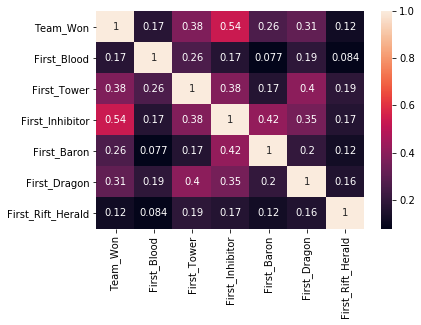

<Figure size 432x288 with 0 Axes>

In [37]:
sn.heatmap(coorMatrix1, annot=True)
plt.show()
plt.savefig('Heat_Correlation_Map.png')

In [38]:
wins_amount_obj_corr = new_dfr[['Team_Won','Team1_Towers_Taken', 'Team1_Inibitors_Taken', 'Team1_Barons_Taken',
                                'Team1_Dragon_Kills', 'Team1_RiftHerald_Kills','Team2_Towers_Taken',
                                'Team2_Inibitors_Taken', 'Team2_Barons_Taken','Team2_Dragon_Kills', 'Team2_RiftHerald_Kills']]

## Strong correlation between amount of 'Inhibitors' taken, 'Towers' taken & 'winner'

In [39]:
coorM = wins_amount_obj_corr.corr()
coorM

,Team_Won,Team1_Towers_Taken,Team1_Inibitors_Taken,Team1_Barons_Taken,Team1_Dragon_Kills,Team1_RiftHerald_Kills,Team2_Towers_Taken,Team2_Inibitors_Taken,Team2_Barons_Taken,Team2_Dragon_Kills,Team2_RiftHerald_Kills
Team_Won,1.000000,-0.771541,-0.649405,-0.369472,-0.472483,-0.218066,0.785813,0.660452,0.399249,0.497206,0.226102
Team1_Towers_Taken,-0.771541,1.000000,0.824471,0.490723,0.626743,0.283925,-0.549123,-0.469600,-0.158556,-0.313789,-0.224888
Team1_Inibitors_Taken,-0.649405,0.824471,1.000000,0.481606,0.538469,0.210728,-0.467867,-0.408924,-0.153026,-0.279089,-0.164355
Team1_Barons_Taken,-0.369472,0.490723,0.481606,1.000000,0.409380,0.119870,-0.144271,-0.146382,-0.189526,-0.027525,-0.053148
Team1_Dragon_Kills,-0.472483,0.626743,0.538469,0.409380,1.000000,0.203930,-0.303139,-0.269714,-0.033048,-0.486093,-0.159509
Team1_RiftHerald_Kills,-0.218066,0.283925,0.210728,0.119870,0.203930,1.000000,-0.214717,-0.157812,-0.053136,-0.149586,-0.325805
Team2_Towers_Taken,0.785813,-0.549123,-0.467867,-0.144271,-0.303139,-0.214717,1.000000,0.825834,0.522166,0.648020,0.290283
Team2_Inibitors_Taken,0.660452,-0.469600,-0.408924,-0.146382,-0.269714,-0.157812,0.825834,1.000000,0.499613,0.548134,0.216553
Team2_Barons_Taken,0.399249,-0.158556,-0.153026,-0.189526,-0.033048,-0.053136,0.522166,0.499613,1.000000,0.444655,0.124451
Team2_Dragon_Kills,0.497206,-0.313789,-0.279089,-0.027525,-0.486093,-0.149586,0.648020,0.548134,0.444655,1.000000,0.220556


In [40]:
mas = np.triu(np.ones_like(coorM, dtype=np.bool))

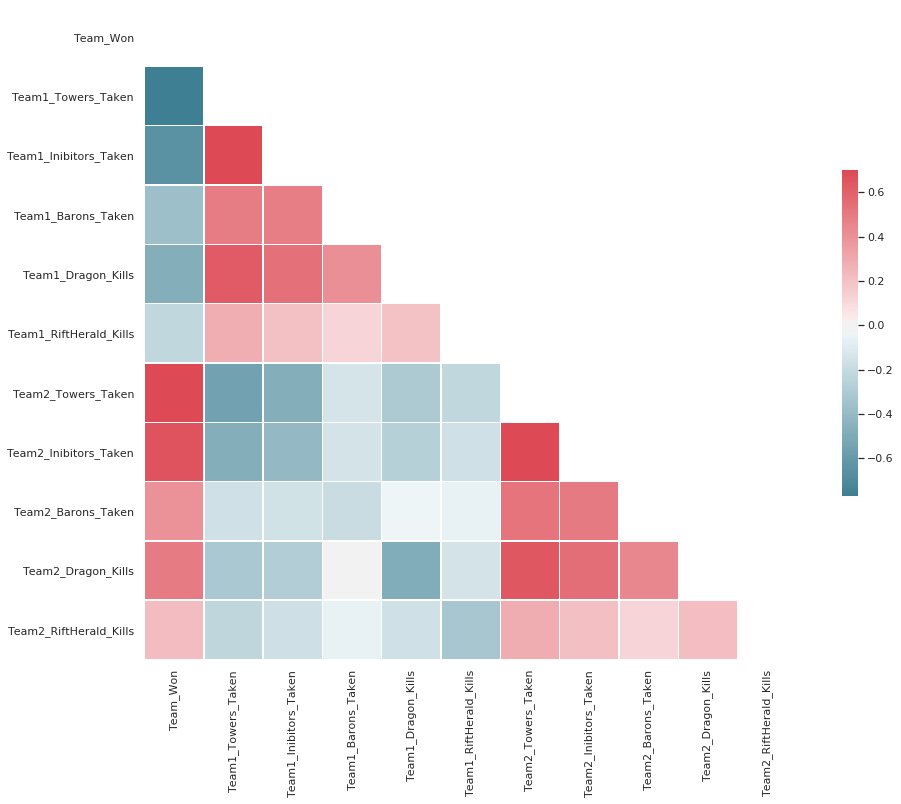

In [148]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(coorM, mask=mas, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('Correlation_Map.png')

In [42]:
#Creating dataframe of champions dictionary to adjust games csv file via Excel
#occam's razor - I figure Pandas/numpy method later

In [43]:
plt.style.use('seaborn-darkgrid')

'''
def get_key(val): 
    for key, value in champion_dict.items(): 
         if val == value: 
             return key 
  
    return "key doesn't exist"
    '''

In [44]:
#get_key(266)

### CHAMPION SELECTED FREQUENCY

In [45]:
vc = pd.DataFrame(new_dfr['Team1_Champion1_ID'].value_counts())
vc

,Team1_Champion1_ID
18,1299
412,1182
67,1030
141,1006
64,906
...,...
30,98
266,96
136,84
427,80


<BarContainer object of 138 artists>

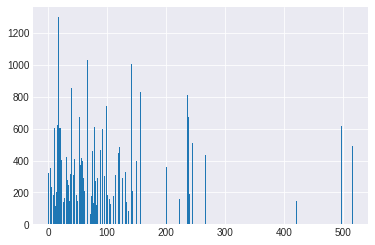

In [46]:
plt.bar(vc.index,vc['Team1_Champion1_ID'])

In [47]:
ls = ['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id','t2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id']

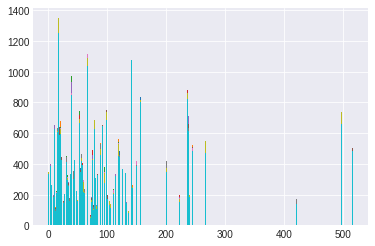

In [48]:
for a in ls:
    td = pd.DataFrame(dfr[a].value_counts())
    plt.bar(td.index,td[a])

### WINS BY TEAM1 & TEAM2

In [49]:
dfr['winner']

0        1
1        1
2        1
3        1
4        1
        ..
51485    2
51486    2
51487    2
51488    2
51489    1
Name: winner, Length: 51490, dtype: int64

In [50]:
dfr[dfr['t2_towerKills']==3]['winner']

4        1
12       1
13       1
38       1
92       1
        ..
51393    1
51404    1
51413    2
51465    1
51469    1
Name: winner, Length: 3978, dtype: int64

In [51]:
dfr[dfr['t2_towerKills']==5]['winner']

0        1
27       2
85       2
100      1
104      1
        ..
51434    2
51445    1
51452    1
51460    1
51476    1
Name: winner, Length: 2709, dtype: int64

In [52]:
dfr['t1_towerKills'].value_counts()

11    5945
0     5938
10    5784
9     5297
1     4428
3     4041
2     3941
8     3918
4     3361
7     3269
5     2960
6     2608
Name: t1_towerKills, dtype: int64

In [53]:
winner_team = pd.DataFrame(dfr['winner'].value_counts())
winner_team

,winner
1,26077
2,25413


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

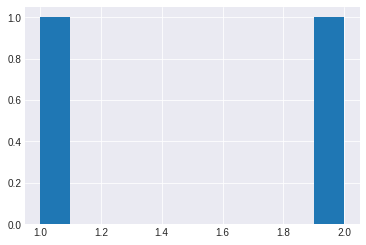

In [54]:
plt.hist((winner_team.index))

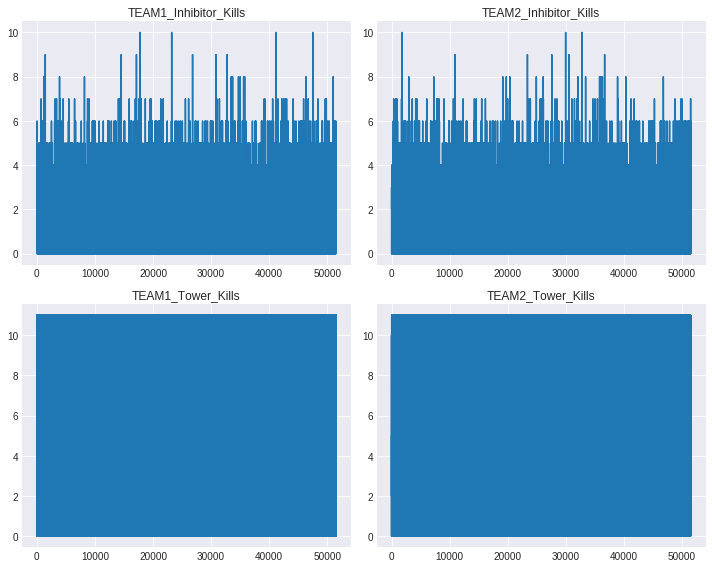

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(10)

# axes[0,0]=plt.bar(dfr['t1_inhibitorKills'].index,dfr['t1_inhibitorKills'])
# #axes[0,0].set_title('TEAM1_Inhibitor_Kills')
# axes[0,1]=plt.bar(dfr['t2_inhibitorKills'].index,dfr['t2_inhibitorKills']) 
# #axes[0,1].set_title('TEAM2_Inhibitor_Kills')
# dfr['t1_towerKills'].plot(ax=axes[1,0]) 
# #axes[1,0].set_title('TEAM1_Tower_Kills')
# dfr['t2_towerKills'].plot(ax=axes[1,1]) 
# #axes[1,1].set_title('TEAM2_Tower_Kills')
# fig.tight_layout()

dfr['t1_inhibitorKills'].plot(ax=axes[0,0])
axes[0,0].set_title('TEAM1_Inhibitor_Kills')
dfr['t2_inhibitorKills'].plot(ax=axes[0,1]) 
axes[0,1].set_title('TEAM2_Inhibitor_Kills')
dfr['t1_towerKills'].plot(ax=axes[1,0]) 
axes[1,0].set_title('TEAM1_Tower_Kills')
dfr['t2_towerKills'].plot(ax=axes[1,1]) 
axes[1,1].set_title('TEAM2_Tower_Kills')
fig.tight_layout()

### Hypthesis Testing

##### Seeing if a team has a certain edge over other teams.

In [56]:
#Team1 had 26077
#Team2 had 25413

In [57]:
average_wins_team1 = 26077/51489
average_wins_team2 = 25413/51489
print(average_wins_team1, average_wins_team2)

0.5064576899920371 0.49356173163199907


In [58]:
binomial = stats.binom(n=51489, p=0.50)
binomial_mean = 0.5 * 51489
binomial_var = 51489 * 0.5 * 0.5
normal_approx = stats.norm(binomial_mean, np.sqrt(binomial_var))
x = np.linspace(0, 51489, num=51000)

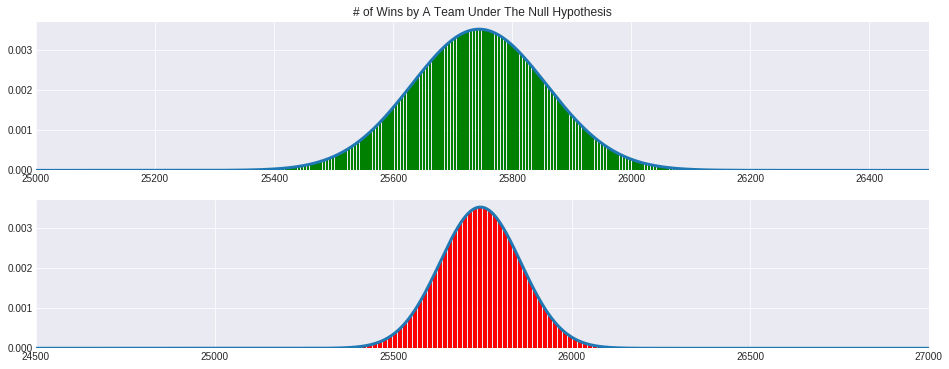

In [59]:
fig, axs = plt.subplots(2, figsize=(16, 6))
bar_sizes = [binomial.pmf(i) for i in range(51489)]
bars = axs[0].bar(range(51489), bar_sizes, color="green", align="center")
axs[0].plot(x, normal_approx.pdf(x), linewidth=3)
axs[0].set_xlim(25000, 26500)

bars = axs[1].bar(range(51489), bar_sizes, color="red", align="center")
axs[1].plot(x, normal_approx.pdf(x), linewidth=3)
axs[1].set_xlim(24500, 27000)

axs[0].set_title("# of Wins by A Team Under The Null Hypothesis")
plt.savefig('Normal_Distribution.png')

In [60]:
team1_wins = dfr['winner'] < 2
team2_wins = dfr['winner'] > 1

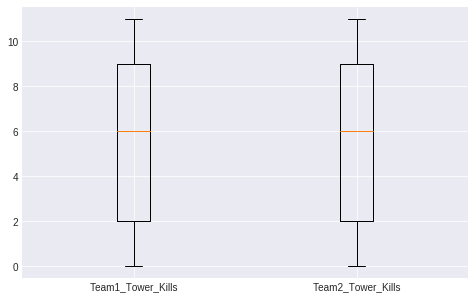

In [61]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.boxplot([dfr['t1_towerKills'], dfr['t2_towerKills']])
ax.set_xticks([1,2])
ax.set_xticklabels(["Team1_Tower_Kills", "Team2_Tower_Kills"])
plt.savefig('TEAM_TOWER_TAKEN.png')

[Text(0, 0, 'Team1_Inhibitor_Kills'), Text(0, 0, 'Team2_Inhibitor_Kills')]

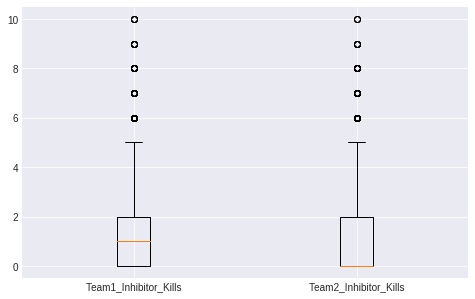

In [62]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.boxplot([dfr['t1_inhibitorKills'], dfr['t2_inhibitorKills']])
ax.set_xticks([1,2])
ax.set_xticklabels(["Team1_Inhibitor_Kills", "Team2_Inhibitor_Kills"])

In [63]:
#Two Sample

In [64]:
pd.DataFrame(champion_dict.items(), columns=['Champion','Code'])

,Champion,Code
0,Aatrox,266
1,Ahri,103
2,Akali,84
3,Alistar,12
4,Amumu,32
...,...,...
143,Zed,238
144,Ziggs,115
145,Zilean,26
146,Zoe,142


In [65]:
x_code =pd.DataFrame(champion_dict.items(), columns=['Champion','Code'])

In [66]:
aa.to_csv('champion_info.csv', index=False)

In [67]:
bb.to_csv('champion_stats.csv', index=False)

In [68]:
x_code.to_csv('champion_code.csv', index=False)

In [69]:
for a in dfr['t1_champ1id']:
    print(a)

8
119
18
57
19
40
74
150
111
427
99
22
79
143
40
23
67
114
222
421
134
238
96
122
498
41
67
19
78
412
8
497
24
67
412
157
25
35
240
24
43
92
85
222
35
150
24
41
126
22
63
18
69
23
497
238
24
10
11
150
24
119
74
238
111
24
21
420
61
67
75
8
79
238
141
497
8
245
103
105
69
18
63
59
245
254
5
15
45
106
81
141
254
131
236
201
48
9
25
119
96
31
19
99
117
19
4
412
64
412
28
82
105
117
157
240
101
18
268
61
27
96
62
4
9
122
59
63
141
53
143
245
498
432
67
115
86
105
516
40
54
163
3
110
22
497
157
13
119
64
157
37
29
48
122
40
54
92
29
141
497
8
99
43
38
103
79
150
92
24
92
64
64
53
119
254
266
110
33
421
90
412
79
35
57
40
18
121
1
141
222
19
412
497
45
115
62
105
33
37
9
11
80
111
120
516
103
1
412
79
101
63
412
18
238
24
432
111
33
11
412
236
150
4
113
99
222
43
16
141
113
267
150
12
161
150
5
79
412
103
17
240
412
69
64
67
119
40
236
111
268
99
34
107
15
64
117
99
22
51
22
201
117
76
119
21
19
16
516
119
161
161
16
61
12
79
4
41
117
57
42
4
432
103
38
157
25
117
35
58
254
59
141
103
85
126

57
59
222
99
45
44
56
223
63
113
427
12
99
119
31
122
119
236
412
58
90
81
41
112
141
113
141
55
498
18
13
429
31
126
83
40
103
64
44
28
85
157
412
74
36
96
161
57
157
202
80
202
58
141
254
157
117
223
83
236
17
202
96
99
201
55
17
222
240
86
57
60
1
17
72
41
121
15
99
101
98
68
15
119
42
23
18
133
201
106
102
163
236
37
111
222
21
164
51
254
164
15
18
3
41
110
236
84
90
3
7
42
19
25
39
80
163
105
267
516
498
21
222
54
429
11
53
11
9
90
101
429
55
6
76
21
141
18
19
40
161
53
55
29
16
21
25
55
37
202
61
32
202
157
56
25
99
121
19
18
117
141
122
96
4
15
90
222
54
90
412
122
429
29
33
141
202
63
92
53
1
29
43
412
75
96
92
92
15
32
141
43
22
1
45
163
40
89
53
236
16
51
90
96
64
40
63
55
74
22
14
122
498
133
122
50
267
59
24
43
104
67
67
110
19
21
107
4
113
412
39
267
119
79
42
51
64
61
432
78
16
31
23
62
102
75
64
245
64
90
32
64
4
34
223
14
32
28
16
24
40
89
157
113
23
92
99
91
53
18
14
34
74
498
4
57
79
22
37
42
62
67
99
23
16
114
8
57
412
238
31
31
14
203
18
67
19
57
18
163
89
90
85
222

76
412
126
34
31
58
40
9
79
498
53
29
90
105
498
92
157
126
31
432
44
164
119
412
412
103
64
412
516
141
105
79
141
114
37
99
86
412
202
90
432
15
157
498
161
117
37
58
103
22
64
114
412
92
20
236
127
238
40
103
18
45
254
10
18
157
11
107
432
57
61
12
91
112
79
7
83
498
18
141
498
267
91
18
1
55
429
81
18
62
516
103
5
141
101
92
21
110
3
20
429
117
498
113
43
69
92
5
498
150
222
238
98
54
99
236
53
131
12
202
150
59
56
267
53
79
18
11
58
19
268
43
11
53
79
84
222
29
121
111
111
3
497
75
238
268
64
40
40
222
21
236
40
18
412
50
14
18
61
96
55
102
7
40
420
121
38
45
25
11
119
222
498
62
58
21
98
53
201
98
6
254
6
14
34
40
12
141
34
40
22
236
222
236
202
81
31
84
54
27
43
105
61
12
105
38
497
67
98
17
43
254
131
236
75
141
63
163
202
99
141
161
29
53
41
141
86
15
86
101
412
119
28
15
75
79
141
60
26
67
126
157
41
59
236
141
105
36
53
107
99
67
11
67
42
56
98
83
5
102
40
56
222
104
40
236
238
22
412
236
69
53
41
240
164
61
163
81
238
115
18
110
106
245
18
150
55
61
154
103
238
69
120
19
12

79
412
57
42
163
127
98
202
254
18
412
80
154
112
62
53
117
126
18
7
103
201
16
33
102
75
22
33
245
31
90
134
75
110
12
64
238
103
102
16
34
121
45
432
245
12
86
133
201
24
11
22
18
64
240
37
14
60
63
45
67
23
64
103
16
29
103
59
141
107
126
498
59
8
37
64
98
134
141
236
427
40
150
79
223
16
92
91
90
17
516
202
59
64
114
78
76
80
103
202
498
79
254
21
76
27
119
498
63
77
18
8
32
59
8
117
27
58
79
114
42
24
113
81
83
11
69
107
112
69
103
516
48
202
236
117
81
5
238
236
117
18
18
28
105
102
143
420
29
98
107
79
429
42
18
3
163
117
432
161
141
12
60
114
67
58
86
67
40
131
92
67
79
238
99
51
35
105
58
74
74
134
157
22
157
516
4
22
37
245
117
236
19
92
238
5
84
41
202
60
78
89
19
39
67
236
12
117
17
133
90
54
36
64
62
29
163
18
89
150
131
154
150
15
8
19
84
62
12
63
127
1
62
58
111
141
497
238
64
420
131
16
516
134
78
6
61
89
74
90
90
84
21
41
37
516
240
29
75
96
18
42
115
64
238
92
60
43
57
12
22
29
99
119
34
236
134
90
92
30
61
64
107
432
59
240
57
92
22
19
29
59
31
222
114
92
79
11
133
3

117
80
5
266
202
53
23
21
53
267
164
498
516
17
105
161
51
412
56
143
75
222
19
82
32
45
254
11
201
103
25
238
412
1
51
32
37
61
163
29
18
3
82
105
245
14
23
61
41
40
44
141
141
117
92
497
44
238
67
141
89
432
432
12
18
10
267
23
8
222
236
121
3
61
20
43
114
157
25
432
34
84
2
25
40
14
8
114
516
91
57
10
19
245
12
157
7
516
245
11
77
33
17
84
64
202
21
53
245
201
3
59
427
18
157
29
53
37
79
43
34
420
24
43
36
75
81
79
80
53
81
154
131
59
4
222
79
103
96
115
63
163
24
11
29
39
43
92
141
64
57
35
56
44
41
63
161
79
236
31
41
432
238
11
64
24
2
57
92
19
61
121
122
432
53
61
105
18
121
161
236
92
81
110
22
59
163
85
45
113
113
117
202
112
203
67
82
53
201
110
53
28
31
31
127
55
24
236
40
41
11
117
121
86
99
86
79
245
64
37
105
53
24
15
67
28
412
16
432
19
18
236
61
69
412
238
101
32
7
412
18
59
85
15
56
24
412
98
110
21
29
57
113
32
110
81
18
131
222
92
76
56
18
58
1
58
67
222
29
14
202
21
7
202
102
254
141
25
91
245
134
157
63
122
98
62
238
82
113
117
113
53
3
11
203
106
157
163
41
420
64

53
59
141
240
236
80
201
12
12
53
420
63
103
238
19
516
99
44
121
3
51
104
54
201
90
92
497
238
516
59
67
78
119
59
25
20
21
99
11
23
39
236
164
89
119
267
60
161
44
15
56
236
64
19
18
267
86
38
37
7
12
40
64
44
91
99
498
19
18
40
516
45
55
82
429
33
21
61
40
84
25
412
157
31
99
497
91
37
105
64
131
1
412
34
28
19
157
44
50
90
131
516
53
86
429
91
143
497
40
157
64
63
202
102
48
236
412
21
6
41
69
19
96
25
150
59
89
28
131
89
99
72
245
516
41
103
119
99
16
36
4
42
122
67
245
41
4
74
90
67
157
497
103
29
63
37
54
21
40
238
29
5
103
18
245
43
81
102
498
14
64
62
82
81
429
35
99
53
90
34
236
53
236
203
161
81
516
122
7
53
68
34
202
111
412
84
141
78
3
103
38
36
64
222
64
516
67
432
12
17
498
25
51
90
150
19
115
54
8
113
53
21
141
11
238
25
22
92
33
24
29
516
154
113
29
55
69
37
19
432
12
67
497
222
81
497
105
498
58
55
78
201
119
42
102
238
236
90
117
17
91
56
44
102
25
33
37
1
222
91
69
122
245
35
412
92
268
55
236
141
18
13
3
104
497
161
266
19
99
19
18
59
122
24
4
40
12
18
74
12
33
20


16
222
141
84
29
40
4
154
55
69
24
134
6
26
122
141
99
412
8
43
12
222
90
98
64
80
163
53
412
29
67
21
2
107
8
23
41
16
134
17
44
45
9
55
22
8
222
11
238
23
105
131
39
23
1
498
51
141
267
38
61
113
37
42
84
81
412
122
24
67
34
497
53
202
90
134
14
17
19
64
67
114
61
103
121
412
84
141
18
117
157
74
57
8
157
150
141
412
31
37
498
201
69
19
60
429
18
22
103
53
157
67
25
53
119
89
18
238
117
267
31
80
15
44
143
412
238
40
81
29
421
114
163
72
24
105
412
17
40
29
122
268
18
11
57
121
19
106
18
222
96
222
64
59
60
92
106
119
22
59
236
497
245
86
81
75
68
53
238
44
68
27
39
412
53
62
117
69
121
40
21
498
238
121
141
81
75
6
143
498
19
11
22
59
67
16
420
412
79
101
11
22
6
18
498
24
141
245
161
43
498
13
126
36
157
267
498
51
14
157
79
266
64
69
113
75
64
27
222
104
43
17
19
8
106
141
157
43
238
61
36
61
18
84
2
105
99
64
67
92
202
202
90
103
24
22
63
161
80
412
114
41
25
163
80
90
59
82
106
412
240
40
22
223
89
267
25
15
412
99
122
19
59
64
236
50
161
89
111
143
111
222
245
33
33
60
19
134
2

42
86
18
102
498
141
79
36
80
16
37
122
29
412
89
516
157
236
21
38
18
76
245
18
75
115
254
412
64
91
59
498
157
35
154
122
23
111
141
96
50
21
64
53
63
96
53
245
24
427
11
86
74
81
37
18
99
112
516
92
75
99
103
33
429
53
122
113
141
69
18
131
29
75
163
75
37
120
64
12
161
35
24
141
127
61
11
9
5
134
19
80
62
7
75
18
202
126
105
42
16
141
16
19
64
80
59
40
51
51
64
59
421
99
245
55
121
75
19
115
62
25
17
6
121
40
222
133
421
89
412
3
62
15
12
7
103
117
57
17
202
121
81
6
99
81
412
42
90
89
68
55
90
59
61
69
5
412
96
222
121
113
202
516
79
18
497
238
61
18
9
43
161
41
163
222
201
24
89
16
36
222
222
497
59
44
64
25
222
61
3
37
22
498
78
18
25
79
25
113
498
432
34
64
114
115
267
154
497
55
105
64
81
40
92
14
5
57
79
53
51
18
99
76
59
19
28
163
69
115
141
267
497
62
40
57
18
498
61
69
126
84
29
51
114
41
238
103
20
1
67
126
8
45
81
79
157
497
67
11
45
34
24
266
29
1
131
497
64
59
41
2
19
7
103
38
69
67
110
23
201
20
24
110
110
42
21
18
44
133
40
120
115
25
150
75
33
55
412
238
21
18
64
86

238
64
34
45
68
63
157
21
432
22
11
38
497
10
53
17
412
25
17
141
39
24
245
23
99
15
99
29
157
120
17
18
53
42
141
222
53
84
16
103
115
9
25
29
42
92
254
41
15
121
2
126
21
98
254
51
131
19
42
58
79
110
40
4
59
75
64
131
157
245
59
201
201
43
267
57
55
31
122
245
18
131
81
21
2
12
24
111
14
143
57
53
22
40
18
420
112
54
91
40
4
40
99
497
245
141
24
92
85
412
69
150
429
222
60
126
54
56
105
201
53
23
157
202
254
1
107
120
157
236
113
62
143
114
103
120
238
72
11
62
63
84
103
498
516
420
81
1
18
67
23
63
79
161
127
48
61
40
61
222
119
266
254
104
17
154
80
222
81
202
201
245
28
245
429
25
164
48
99
57
12
133
110
22
67
24
119
498
105
92
222
222
267
29
164
429
86
24
39
238
150
28
59
236
102
18
412
25
39
21
223
62
64
222
92
35
64
120
107
105
268
432
79
12
59
36
53
41
498
223
3
55
202
222
412
163
61
31
25
80
119
1
201
157
91
24
150
36
7
222
143
429
110
76
412
10
40
55
516
20
99
16
77
157
154
236
17
254
101
119
141
8
59
164
99
420
497
8
131
31
69
412
117
121
11
25
498
75
58
412
267
222
22
119

121
6
86
18
81
18
131
114
102
412
18
122
268
157
131
238
38
2
268
53
86
25
202
120
133
412
236
117
120
238
7
240
18
69
99
31
67
99
1
89
75
161
79
113
245
42
19
516
61
67
25
18
25
201
33
429
412
222
35
64
222
45
121
254
61
134
69
83
41
25
64
141
202
15
117
64
67
81
64
6
79
150
202
7
14
86
99
267
141
222
60
101
18
122
107
78
236
25
131
37
33
121
40
86
18
18
75
117
69
236
112
67
60
110
57
115
79
103
2
58
96
89
497
157
53
103
41
102
11
236
13
24
245
40
119
24
39
37
25
421
115
134
236
1
41
60
8
40
254
11
202
112
154
141
22
119
86
98
25
86
18
85
17
236
99
101
33
201
150
60
7
39
498
11
163
15
58
51
15
254
498
77
22
25
31
51
35
40
54
16
497
57
141
21
41
92
19
111
38
34
92
51
23
4
122
18
41
60
245
120
14
81
22
3
53
223
1
91
114
41
99
31
22
22
112
86
4
131
75
154
4
81
5
9
38
56
498
75
3
12
141
53
67
117
51
77
56
115
45
126
103
114
99
238
17
90
63
119
63
19
77
119
3
43
103
121
34
79
89
120
53
222
122
99
11
60
7
141
40
92
245
41
63
51
53
50
40
238
57
18
222
17
103
110
254
18
53
24
82
23
54
63
74
6

222
28
3
27
412
103
117
64
62
44
78
96
96
19
16
18
86
68
29
61
157
45
61
161
497
89
163
201
67
267
498
157
267
36
18
497
41
11
202
105
40
164
131
157
86
121
61
40
40
19
64
91
14
3
432
40
254
92
81
85
498
134
121
157
157
34
19
11
126
99
53
69
28
29
62
164
99
37
161
16
161
57
60
110
29
90
245
40
74
51
74
16
22
412
22
421
17
19
126
59
120
51
8
62
134
14
64
92
119
114
81
92
18
9
64
222
74
44
9
35
81
117
29
11
91
117
59
24
59
201
163
60
89
51
161
81
99
17
201
42
25
12
115
111
4
134
43
245
59
110
77
96
202
43
34
105
40
48
57
1
22
143
11
44
64
112
68
154
516
5
117
497
37
96
63
56
99
89
202
238
113
236
64
420
110
164
91
40
61
80
201
7
238
98
55
86
516
14
99
497
432
107
67
134
38
498
267
75
77
15
26
51
79
122
18
18
106
202
64
58
92
31
81
115
245
61
106
51
99
20
57
105
98
69
412
103
112
59
23
86
103
202
498
164
497
498
201
121
69
498
105
19
131
112
154
24
222
18
236
150
67
63
62
16
18
21
51
103
64
43
53
141
267
79
31
33
69
238
266
92
10
99
51
48
429
11
25
67
75
103
91
81
22
429
57
17
8
24
19
201

266
89
11
119
16
19
67
90
59
112
2
58
498
86
8
105
92
203
8
64
67
63
86
24
30
63
222
134
17
61
89
113
29
119
51
240
53
103
21
2
110
29
51
61
62
9
236
56
23
40
69
40
141
38
113
18
17
110
103
96
17
6
48
53
164
67
48
157
245
115
15
57
161
17
421
17
412
238
115
240
32
64
33
67
24
202
432
498
133
64
18
141
201
89
84
84
18
133
92
63
105
42
254
107
78
37
103
26
67
59
25
101
45
40
61
18
45
143
254
92
39
134
79
25
24
74
29
38
89
3
113
31
8
236
75
497
12
24
63
62
412
245
164
18
238
69
67
51
91
89
497
19
55
89
53
10
201
32
58
141
21
429
2
117
141
64
157
497
29
236
61
92
21
80
41
35
19
134
43
117
131
498
98
4
236
238
96
53
81
31
40
25
31
5
18
18
497
43
134
1
64
31
23
412
51
245
21
3
154
18
64
117
412
432
61
92
18
267
4
223
498
24
96
92
29
84
163
122
222
141
18
62
16
29
115
81
157
102
498
61
67
111
131
96
429
40
15
69
201
91
117
161
106
432
22
202
55
38
222
122
161
117
21
11
498
19
115
64
164
22
498
67
236
67
29
90
134
34
25
119
60
90
32
141
19
157
80
29
222
26
61
51
5
267
432
157
161
101
84
21
53


58
79
238
32
16
516
77
29
89
245
412
57
245
16
267
238
201
101
497
90
16
16
412
44
38
78
238
11
154
432
4
4
126
267
64
90
89
157
497
75
63
105
1
18
35
19
126
17
141
141
31
222
22
17
429
117
105
122
114
24
245
61
18
78
498
143
11
3
18
50
154
61
55
61
498
117
64
131
412
222
497
76
11
114
67
412
7
74
82
76
141
60
18
32
24
11
201
236
58
99
121
120
4
103
12
236
222
7
34
412
96
24
31
68
497
222
16
91
236
90
23
27
236
54
157
67
67
238
85
23
22
79
107
141
19
236
103
63
11
86
54
19
498
96
222
150
113
119
18
86
238
84
161
45
157
498
61
19
133
64
37
121
45
64
54
516
64
245
115
26
64
85
516
432
23
48
11
245
55
67
64
83
25
25
18
61
98
41
236
150
498
53
498
236
202
25
236
222
99
17
119
79
240
412
26
412
84
103
7
27
15
202
67
420
141
432
59
8
64
29
63
238
201
74
412
40
27
81
20
3
89
117
90
55
134
64
99
6
8
17
32
103
11
141
161
163
21
34
57
24
117
134
202
19
29
18
78
236
254
64
24
60
497
121
133
122
41
92
44
53
53
48
245
222
48
61
202
497
29
122
24
91
18
48
57
45
498
24
101
114
119
150
223
67
114
68
5

103
26
84
105
24
202
34
497
245
18
31
59
22
141
121
57
55
202
84
92
115
18
83
99
38
23
10
117
79
141
59
44
427
157
51
103
75
81
238
120
119
117
99
25
40
18
498
498
11
24
498
53
37
83
89
57
69
89
113
31
84
23
80
37
55
62
16
99
113
154
41
117
202
90
67
498
236
131
141
107
240
67
107
99
238
20
16
86
29
25
16
18
31
497
25
104
432
238
236
131
497
92
32
24
25
92
127
141
19
40
412
22
79
91
412
86
266
15
25
67
223
412
67
154
14
18
222
16
89
236
29
61
245
99
412
131
113
267
8
37
92
412
41
61
127
103
40
141
516
21
41
236
420
54
202
1
133
131
77
141
79
35
122
516
163
16
79
13
99
163
91
10
25
498
28
55
113
69
61
105
134
69
31
89
27
58
59
79
18
412
202
67
90
103
53
69
164
72
64
59
86
41
34
154
39
157
33
84
498
91
17
432
202
18
61
84
18
6
240
50
412
91
267
126
79
131
5
63
110
26
122
63
36
80
201
33
22
110
412
45
64
29
141
37
29
412
55
42
11
114
3
201
122
51
91
5
11
102
18
8
236
63
55
516
15
16
18
24
40
81
44
25
90
102
98
103
24
143
45
497
202
122
104
82
67
92
84
60
157
7
497
39
59
5
99
19
236
38
33


92
432
41
79
59
103
79
268
18
117
8
77
267
96
54
59
202
104
412
35
516
201
61
126
141
35
19
38
157
67
103
28
111
25
24
161
222
154
59
117
90
11
102
150
222
117
23
267
245
29
51
21
202
67
51
96
53
15
105
427
420
58
79
53
114
39
75
119
432
267
17
35
31
99
67
202
11
157
497
67
78
51
23
154
40
202
45
154
117
59
157
254
25
122
202
57
18
117
18
112
254
11
113
134
96
254
202
41
134
154
113
40
35
54
114
7
40
34
32
254
111
77
48
141
223
412
111
67
8
16
75
161
45
238
236
201
40
254
201
67
57
41
40
202
141
53
37
40
21
64
11
432
150
55
38
43
11
91
516
143
497
23
5
127
412
79
55
412
113
29
41
31
89
117
432
114
498
32
92
43
11
40
22
421
105
1
33
164
7
202
497
121
201
7
42
50
67
114
90
33
7
19
84
16
11
238
98
245
98
78
119
35
222
40
67
57
103
69
59
11
21
64
67
15
117
92
17
82
20
113
112
32
107
22
164
45
53
33
61
11
412
18
4
54
16
2
112
122
21
498
5
102
115
79
25
78
31
15
25
201
432
134
74
25
5
19
18
21
223
29
412
23
61
34
64
69
38
32
99
28
161
31
84
35
141
432
163
105
23
57
19
40
201
54
38
12
114
64


5
120
44
134
83
26
141
11
31
63
104
59
498
117
4
33
117
236
19
29
267
89
420
133
53
222
86
43
32
45
516
202
516
222
498
99
53
40
122
114
54
25
236
103
141
103
115
63
110
103
103
40
64
37
16
121
105
79
92
121
157
497
412
22
62
38
141
7
161
39
86
238
111
12
91
64
18
79
107
119
53
12
53
81
78
420
117
92
126
201
41
10
12
238
117
150
103
92
157
141
157
51
22
9
150
113
43
24
32
157
85
497
497
22
67
154
23
60
90
103
64
29
90
86
89
7
11
90
89
202
79
245
245
141
23
254
267
22
267
223
63
41
498
113
20
86
8
91
122
429
92
26
131
154
37
33
25
40
99
6
202
58
2
120
64
497
131
75
28
51
29
412
121
29
60
28
25
11
102
497
92
8
254
19
203
4
21
48
64
105
67
37
202
53
4
91
99
20
412
22
81
122
41
67
202
113
119
17
25
21
103
80
141
429
33
27
41
110
57
115
117
67
14
36
223
16
21
498
40
222
79
64
268
80
161
17
75
59
516
69
412
133
121
81
67
23
9
412
48
18
55
51
154
64
68
429
42
20
45
238
69
24
28
18
15
126
17
4
59
31
51
8
104
99
113
157
141
105
122
12
102
38
136
141
23
516
51
53
19
24
122
99
240
53
28
75
238
19

5
92
20
12
29
53
55
21
127
429
11
6
33
38
126
43
81
101
19
236
236
30
37
112
98
51
122
222
110
45
201
99
202
161
238
10
38
238
111
75
236
79
236
117
23
17
154
67
54
11
516
36
6
105
41
37
236
92
64
110
9
81
498
14
75
163
117
119
96
412
223
99
29
420
1
23
429
57
223
157
84
59
92
238
3
113
92
40
18
222
59
78
498
119
64
114
32
25
238
50
1
119
51
62
3
24
39
37
85
55
122
24
516
85
78
112
29
131
157
497
202
38
115
67
53
161
53
119
240
80
14
84
114
112
5
23
91
18
3
75
498
58
497
29
86
16
54
84
90
121
110
420
21
85
81
203
91
20
2
61
40
29
136
18
67
89
59
497
122
254
25
498
29
121
50
163
103
32
115
22
54
161
67
110
222
412
86
39
141
60
80
75
113
58
134
81
114
51
157
55
48
42
16
201
35
68
89
92
37
114
121
58
81
75
121
42
27
62
117
516
268
77
202
18
38
254
432
40
24
20
202
79
201
122
9
57
57
119
429
55
33
497
113
53
77
497
103
15
44
37
43
103
89
41
48
245
67
267
202
67
412
63
8
29
516
11
89
86
23
201
64
8
141
51
412
40
33
59
12
120
126
4
26
55
29
67
4
29
92
104
64
29
68
75
101
201
36
113
122
58
12

202
67
127
11
57
33
31
134
43
69
131
6
134
21
134
412
19
141
11
98
38
99
245
59
113
53
90
164
117
32
67
498
45
8
40
266
53
429
51
516
429
516
14
55
64
31
60
497
126
120
45
67
14
157
238
53
17
84
19
38
11
161
134
115
58
150
161
3
18
18
412
67
61
201
86
74
412
99
81
96
92
429
51
75
38
201
24
412
23
104
21
131
51
102
13
122
119
92
51
41
150
113
134
222
61
64
131
89
254
10
421
157
43
55
40
61
141
24
67
67
69
55
4
79
37
16
74
103
99
157
84
18
80
16
60
420
202
56
59
62
45
15
120
54
18
84
32
29
103
86
51
238
24
412
85
5
267
121
412
22
131
16
17
29
81
81
254
103
24
164
19
15
19
497
117
131
18
18
101
90
2
64
16
18
64
412
63
50
1
96
141
122
22
31
133
58
99
201
92
223
240
16
25
102
60
202
18
157
37
36
12
51
3
516
8
141
429
4
110
11
117
107
3
141
24
6
69
92
121
11
19
516
35
31
64
22
80
223
33
83
22
44
516
268
43
55
150
21
104
79
80
35
238
18
67
163
21
59
31
18
67
53
75
99
236
55
516
79
57
412
110
18
29
5
498
59
86
121
45
29
59
133
202
107
110
102
79
31
48
64
40
36
3
117
79
429
64
53
141
79
91
150


64
78
120
121
77
267
112
121
3
429
10
61
69
29
45
267
61
96
68
102
29
17
429
427
236
18
117
72
202
498
498
56
64
99
432
40
119
40
41
222
121
107
51
203
32
236
267
33
121
154
14
81
154
498
157
84
22
53
31
24
90
245
37
99
63
51
64
38
412
21
40
164
134
24
16
497
127
18
40
64
21
22
240
27
18
26
61
112
31
38
22
5
113
5
24
412
238
121
92
1
412
126
17
25
105
2
3
121
516
121
45
101
14
5
23
23
34
105
133
497
59
59
34
19
11
24
498
51
5
254
5
107
432
134
63
11
10
99
51
3
64
107
240
58
201
266
107
164
59
53
31
24
150
37
40
68
157
202
64
6
38
39
236
102
17
122
245
516
67
67
67
238
57
96
421
31
222
41
67
37
74
141
58
75
24
245
40
90
35
157
69
245
69
33
15
82
43
8
516
23
58
7
39
64
40
110
64
92
122
34
10
238
7
99
101
201
79
498
51
101
114
37
236
42
150
64
33
16
201
420
164
141
203
33
12
12
1
25
99
131
222
150
81
12
24
127
141
161
112
21
54
39
18
98
19
157
432
99
201
53
117
24
89
119
1
236
143
76
113
2
19
117
106
117
157
18
134
25
201
105
15
11
157
102
51
21
40
16
104
25
23
63
91
112
62
222
40
238
59


In [73]:
import scipy.stats as stats

In [74]:
win1 = dfr[dfr['winner']==1].groupby('t2_towerKills')['winner'].count()

In [75]:
win2 = dfr[dfr['winner']==2].groupby('t2_towerKills')['winner'].count()

In [76]:
win_grid=pd.concat([win1,win2], axis=1)

In [78]:
win_grid.columns=['win1','win2']

In [79]:
stats.chisquare(win_grid['win1'],win_grid['win2'])

Power_divergenceResult(statistic=528149.3124601298, pvalue=0.0)

In [80]:
from scipy.stats import chi2_contingency
obs = np.array([[10, 10, 20], [20, 20, 20]])
chi2_contingency(win_grid['win1'],win_grid['win2'])

(0.0,
 1.0,
 0,
 array([6113., 4621., 4013., 3576., 2560., 1930., 1314.,  906.,  547.,
         288.,  148.,   61.]))

In [81]:
chi2_contingency(win_grid)

(34066.85902668579,
 0.0,
 11,
 array([[3394.21351719, 3307.78648281],
        [2370.68240435, 2310.31759565],
        [2127.58743445, 2073.41256555],
        [2014.64956302, 1963.35043698],
        [1592.27205283, 1551.72794717],
        [1371.96723636, 1337.03276364],
        [1207.87813168, 1177.12186832],
        [1645.44907749, 1603.55092251],
        [1899.68590017, 1851.31409983],
        [2615.80316566, 2549.19683434],
        [2895.36238104, 2821.63761896],
        [2941.44913575, 2866.55086425]]))

In [82]:
win_grid

,win1,win2
t2_towerKills,,
0,6113,589
1,4621,60
2,4013,188
3,3576,402
4,2560,584
5,1930,779
6,1314,1071
7,906,2343
8,547,3204


In [83]:
s1 = dfr[dfr['t2_towerKills']==2]['winner']

In [84]:
sample2 = dfr[dfr['t2_towerKills']!=2]['winner']

In [85]:
stats.ttest_ind(win1,win2)

Ttest_indResult(statistic=0.0646867001822193, pvalue=0.9490076463509586)

In [86]:
sample2

0        1
3        1
4        1
5        1
7        1
        ..
51485    2
51486    2
51487    2
51488    2
51489    1
Name: winner, Length: 47289, dtype: int64

In [87]:
s1

1        1
2        1
6        1
11       1
17       1
        ..
51411    1
51427    1
51437    1
51453    1
51457    1
Name: winner, Length: 4201, dtype: int64

In [88]:
new_dfr.columns

Index(['Game_ID', 'Creation_Time', 'Game_Duration', 'Season_ID', 'Team_Won',
       'First_Blood', 'First_Tower', 'First_Inhibitor', 'First_Baron',
       'First_Dragon', 'First_Rift_Herald', 'Team1_Champion1_ID',
       'TEAM1_CHAMPION1_SUMMONER_SPELL1', 'TEAM1_CHAMPION1_SUMMONER_SPELL2',
       'Team1_Champion2_ID', 'TEAM1_CHAMPION2_SUMMONER_SPELL1',
       'TEAM1_CHAMPION2_SUMMONER_SPELL2', 'Team1_Champion3_ID',
       'TEAM1_CHAMPION3_SUMMONER_SPELL1', 'TEAM1_CHAMPION3_SUMMONER_SPELL2',
       'Team1_Champion4_ID', 'TEAM1_CHAMPION4_SUMMONER_SPELL1',
       'TEAM1_CHAMPION4_SUMMONER_SPELL2', 'Team1_Champion5_ID',
       'TEAM1_CHAMPION5_SUMMONER_SPELL1', 'TEAM1_CHAMPION5_SUMMONER_SPELL2',
       'Team1_Towers_Taken', 'Team1_Inibitors_Taken', 'Team1_Barons_Taken',
       'Team1_Dragon_Kills', 'Team1_RiftHerald_Kills',
       'TEAM_1_banned_champion1', 'TEAM_1_banned_champion2',
       'TEAM_1_banned_champion3', 'TEAM_1_banned_champion4',
       'TEAM_1_banned_champion5', 'Team2_Champ

In [89]:
new_dfr.describe()

,Game_ID,Creation_Time,Game_Duration,Season_ID,Team_Won,First_Blood,First_Tower,First_Inhibitor,First_Baron,First_Dragon,...,Team2_Towers_Taken,Team2_Inibitors_Taken,Team2_Barons_Taken,Team2_Dragon_Kills,Team2_RiftHerald_Kills,TEAM_2_banned_champion1,TEAM_2_banned_champion2,TEAM_2_banned_champion3,TEAM_2_banned_champion4,TEAM_2_banned_champion5
count,5.149000e+04,5.149000e+04,51490.000000,51490.0,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,...,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,3.306223e+09,1.502926e+12,1832.362808,9.0,1.493552,1.471295,1.450631,1.308487,0.926510,1.442804,...,5.549466,0.985084,0.414547,1.404370,0.240105,108.216294,107.910216,108.690581,108.626044,108.066576
std,2.946096e+07,1.978026e+09,512.017696,0.0,0.499963,0.520326,0.542848,0.676097,0.841424,0.569579,...,3.860989,1.256284,0.613768,1.224492,0.427151,102.551787,102.870710,102.592145,103.346952,102.756149
min,3.214824e+09,1.496892e+12,190.000000,9.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.292218e+09,1.502021e+12,1531.000000,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,38.000000,37.000000,38.000000,38.000000,38.000000
50%,3.320021e+09,1.503844e+12,1833.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,0.000000,0.000000,1.000000,0.000000,90.000000,90.000000,90.000000,90.000000,90.000000
75%,3.327099e+09,1.504352e+12,2148.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,9.000000,2.000000,1.000000,2.000000,0.000000,141.000000,141.000000,141.000000,141.000000,141.000000
max,3.331833e+09,1.504707e+12,4728.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,11.000000,10.000000,4.000000,6.000000,1.000000,516.000000,516.000000,516.000000,516.000000,516.000000


In [90]:
new_dfr['Team1_Towers_Taken'].describe()

count    51490.000000
mean         5.699359
std          3.799808
min          0.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         11.000000
Name: Team1_Towers_Taken, dtype: float64

In [91]:
new_dfr['Team2_Towers_Taken'].describe()

count    51490.000000
mean         5.549466
std          3.860989
min          0.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         11.000000
Name: Team2_Towers_Taken, dtype: float64

In [92]:
new_dfr['Team1_Inibitors_Taken'].describe()

count    51490.000000
mean         1.017537
std          1.263934
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: Team1_Inibitors_Taken, dtype: float64

In [93]:
new_dfr['Team2_Inibitors_Taken'].describe()

count    51490.000000
mean         0.985084
std          1.256284
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         10.000000
Name: Team2_Inibitors_Taken, dtype: float64

In [94]:
Team1_data = new_dfr[new_dfr['Team_Won']==1]
Team1_data

,Game_ID,Creation_Time,Game_Duration,Season_ID,Team_Won,First_Blood,First_Tower,First_Inhibitor,First_Baron,First_Dragon,...,Team2_Towers_Taken,Team2_Inibitors_Taken,Team2_Barons_Taken,Team2_Dragon_Kills,Team2_RiftHerald_Kills,TEAM_2_banned_champion1,TEAM_2_banned_champion2,TEAM_2_banned_champion3,TEAM_2_banned_champion4,TEAM_2_banned_champion5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51472,3311241519,1503235106910,1729,9,1,2,1,1,0,1,...,0,0,0,0,0,134,89,31,64,40
51476,3324027965,1504116931395,2389,9,1,2,2,1,0,1,...,5,0,0,1,0,122,105,141,53,516
51479,3328396986,1504449732117,1557,9,1,1,1,1,0,2,...,1,0,0,2,0,40,91,18,67,117
51481,3269295840,1500411788750,2246,9,1,1,1,2,1,2,...,9,2,1,2,0,19,51,154,3,122


In [95]:
Team2_data = new_dfr[new_dfr['Team_Won']==2]
Team2_data

,Game_ID,Creation_Time,Game_Duration,Season_ID,Team_Won,First_Blood,First_Tower,First_Inhibitor,First_Baron,First_Dragon,...,Team2_Towers_Taken,Team2_Inibitors_Taken,Team2_Barons_Taken,Team2_Dragon_Kills,Team2_RiftHerald_Kills,TEAM_2_banned_champion1,TEAM_2_banned_champion2,TEAM_2_banned_champion3,TEAM_2_banned_champion4,TEAM_2_banned_champion5
8,3318040883,1503686577549,1387,9,2,2,2,2,0,2,...,8,1,0,2,1,28,51,53,157,40
9,3327786881,1504385918871,2681,9,2,2,2,2,2,2,...,8,3,1,2,0,64,141,84,67,53
10,3325996400,1504273919929,1391,9,2,2,2,2,2,2,...,10,2,1,1,1,19,74,122,59,412
14,3329332855,1504479222082,2374,9,2,2,2,1,1,2,...,9,2,0,2,0,31,67,202,53,119
16,3316242660,1503574693354,2390,9,2,2,2,2,2,2,...,9,3,2,4,0,18,134,53,420,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51484,3316694929,1503589096685,2701,9,2,2,1,2,2,2,...,11,5,2,3,0,57,21,157,53,58
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157


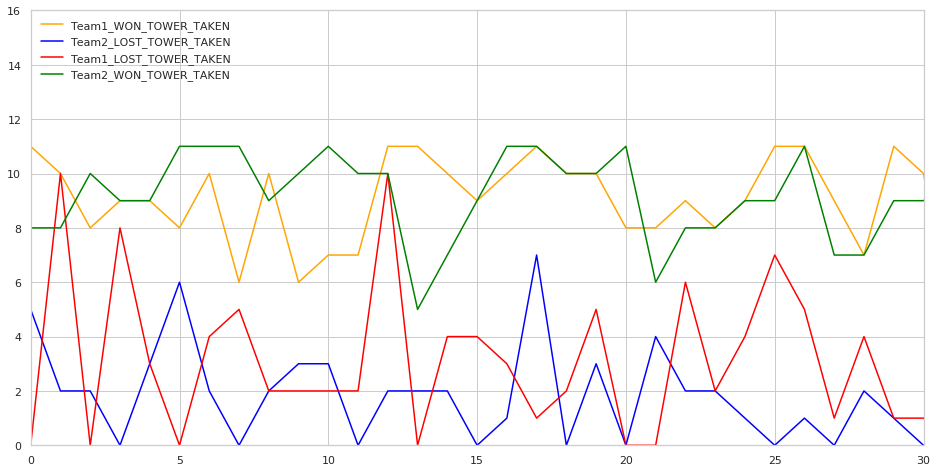

<Figure size 432x288 with 0 Axes>

In [149]:
fig = plt.figure(figsize=(16,8))
plt.plot(range(26077), Team1_data['Team1_Towers_Taken'], color='orange', label="Team1_WON_TOWER_TAKEN")
plt.plot(range(26077), Team1_data['Team2_Towers_Taken'],color='blue', label="Team2_LOST_TOWER_TAKEN")
plt.plot(range(25413), Team2_data['Team1_Towers_Taken'], color='red', label="Team1_LOST_TOWER_TAKEN")
plt.plot(range(25413), Team2_data['Team2_Towers_Taken'],color='green', label="Team2_WON_TOWER_TAKEN")
plt.legend(loc="upper left")
plt.xlim(0,30)
plt.ylim(0,16)
plt.show()
plt.savefig('Towers_Taken_By_Win_Lost.png')

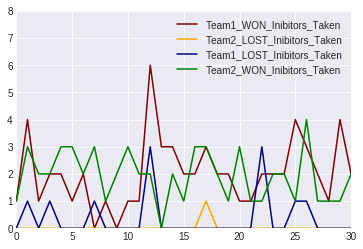

In [97]:
fig = plt.figure()
plt.plot(range(26077), Team1_data['Team1_Inibitors_Taken'], color='maroon', label="Team1_WON_Inibitors_Taken")
plt.plot(range(26077), Team1_data['Team2_Inibitors_Taken'],color='orange', label="Team2_LOST_Inibitors_Taken")
plt.plot(range(25413), Team2_data['Team1_Inibitors_Taken'], color='navy', label="Team1_LOST_Inibitors_Taken")
plt.plot(range(25413), Team2_data['Team2_Inibitors_Taken'],color='green', label="Team2_WON_Inibitors_Taken")
plt.legend(loc="upper right")
plt.xlim(0,30)
plt.ylim(0,8)
plt.show()

#### Generating new dataframe - Merging Champion names

In [99]:
ddfr = pd.read_csv('data/new_games.csv')

In [100]:
ddfr=ddfr.rename(columns={'gameId' : 'Game_ID', 'creationTime': 'Creation_Time', 'gameDuration':'Game_Duration',
                    'seasonId':'Season_ID', 'winner': 'Team_Won',
                    'firstBlood':'First_Blood', 'firstTower':'First_Tower', 'firstInhibitor':'First_Inhibitor',
                    'firstBaron': 'First_Baron','firstDragon':'First_Dragon', 'firstRiftHerald':'First_Rift_Herald',
                    't1_champ1id':'Team1_Champion1_ID', 't1_champ1_sum1':'TEAM1_CHAMPION1_SUMMONER_SPELL1',
                    't1_champ1_sum2':'TEAM1_CHAMPION1_SUMMONER_SPELL2', 't1_champ2id':'Team1_Champion2_ID',
                    't1_champ2_sum1':'TEAM1_CHAMPION2_SUMMONER_SPELL1', 't1_champ2_sum2':'TEAM1_CHAMPION2_SUMMONER_SPELL2',
                    't1_champ3id':'Team1_Champion3_ID', 't1_champ3_sum1':'TEAM1_CHAMPION3_SUMMONER_SPELL1',
                    't1_champ3_sum2':'TEAM1_CHAMPION3_SUMMONER_SPELL2',
                    't1_champ4id':'Team1_Champion4_ID',
                    't1_champ4_sum1':'TEAM1_CHAMPION4_SUMMONER_SPELL1', 't1_champ4_sum2':'TEAM1_CHAMPION4_SUMMONER_SPELL2',
                    't1_champ5id':'Team1_Champion5_ID', 't1_champ5_sum1':'TEAM1_CHAMPION5_SUMMONER_SPELL1',
                    't1_champ5_sum2':'TEAM1_CHAMPION5_SUMMONER_SPELL2', 't1_towerKills':'Team1_Towers_Taken',
                    't1_inhibitorKills':'Team1_Inibitors_Taken', 't1_baronKills':'Team1_Barons_Taken',
                    't1_dragonKills':'Team1_Dragon_Kills', 't1_riftHeraldKills':'Team1_RiftHerald_Kills',
                    't1_ban1': 'TEAM_1_banned_champion1', 
                    't1_ban2': 'TEAM_1_banned_champion2', 't1_ban3': 'TEAM_1_banned_champion3',
                    't1_ban4': 'TEAM_1_banned_champion4', 't1_ban5': 'TEAM_1_banned_champion5', 
                    't2_champ1id':'Team2_Champion1_ID', 't2_champ1_sum1':'TEAM2_CHAMPION1_SUMMONER_SPELL1',
                    't2_champ1_sum2':'TEAM2_CHAMPION1_SUMMONER_SPELL2',
                    't2_champ2id':'Team2_Champion2_ID', 't2_champ2_sum1':'TEAM2_CHAMPION2_SUMMONER_SPELL1',
                    't2_champ2_sum2':'TEAM2_CHAMPION2_SUMMONER_SPELL2',
                    't2_champ3id':'Team2_Champion3_ID',
                    't2_champ3_sum1':'TEAM2_CHAMPION3_SUMMONER_SPELL1', 't2_champ3_sum2':'TEAM2_CHAMPION3_SUMMONER_SPELL2',
                    't2_champ4id':'Team2_Champion4_ID', 't2_champ4_sum1':'TEAM2_CHAMPION4_SUMMONER_SPELL1','t2_champ4_sum2':'TEAM2_CHAMPION4_SUMMONER_SPELL2',
                    't2_champ5id':'Team2_Champion5_ID', 't2_champ5_sum1':'TEAM2_CHAMPION5_SUMMONER_SPELL1', 't2_champ5_sum2':'TEAM2_CHAMPION5_SUMMONER_SPELL2',
                    't2_towerKills':'Team2_Towers_Taken', 't2_inhibitorKills':'Team2_Inibitors_Taken',
                    't2_baronKills':'Team2_Barons_Taken', 't2_dragonKills':'Team2_Dragon_Kills',
                    't2_riftHeraldKills':'Team2_RiftHerald_Kills', 't2_ban1': 'TEAM_2_banned_champion1', 
                    't2_ban2': 'TEAM_2_banned_champion2', 't2_ban3': 'TEAM_2_banned_champion3', 
                    't2_ban4': 'TEAM_2_banned_champion4','t2_ban5': 'TEAM_2_banned_champion5'})

In [143]:
ddfr[['Team_Won',
       'First_Blood', 'First_Tower', 'First_Inhibitor', 'First_Baron',
       'First_Dragon', 'First_Rift_Herald', 'Team1_Champion1_ID',
       'TEAM1_CHAMPION1', 'TEAM1_CHAMPION1_SUMMONER_SPELL1',
       'TEAM1_CHAMPION1_SUMMONER_SPELL2', 'Team1_Champion2_ID',
       'TEAM1_CHAMPION2', 'TEAM1_CHAMPION2_SUMMONER_SPELL1',
       'TEAM1_CHAMPION2_SUMMONER_SPELL2', 'Team1_Champion3_ID',
       'TEAM1_CHAMPION3', 'TEAM1_CHAMPION3_SUMMONER_SPELL1',
       'TEAM1_CHAMPION3_SUMMONER_SPELL2', 'Team1_Champion4_ID',
       'TEAM1_CHAMPION4', 'TEAM1_CHAMPION4_SUMMONER_SPELL1',
       'TEAM1_CHAMPION4_SUMMONER_SPELL2', 'Team1_Champion5_ID',
       'TEAM1_CHAMPION5', 'TEAM1_CHAMPION5_SUMMONER_SPELL1',
       'TEAM1_CHAMPION5_SUMMONER_SPELL2', 'Team1_Towers_Taken',
       'Team1_Inibitors_Taken', 'Team1_Barons_Taken', 'Team1_Dragon_Kills',
       'Team1_RiftHerald_Kills']][:50]

,Team_Won,First_Blood,First_Tower,First_Inhibitor,First_Baron,First_Dragon,First_Rift_Herald,Team1_Champion1_ID,TEAM1_CHAMPION1,TEAM1_CHAMPION1_SUMMONER_SPELL1,...,TEAM1_CHAMPION4_SUMMONER_SPELL2,Team1_Champion5_ID,TEAM1_CHAMPION5,TEAM1_CHAMPION5_SUMMONER_SPELL1,TEAM1_CHAMPION5_SUMMONER_SPELL2,Team1_Towers_Taken,Team1_Inibitors_Taken,Team1_Barons_Taken,Team1_Dragon_Kills,Team1_RiftHerald_Kills
0,1,2,1,1,1,1,2,8,Vladimir,12,...,6,112,Viktor,4,14,11,1,2,3,0
1,1,1,1,1,0,1,1,119,Draven,7,...,14,35,Shaco,4,11,10,4,0,2,1
2,1,2,1,1,1,2,0,18,Tristana,4,...,12,38,Kassadin,12,4,8,1,1,1,0
3,1,1,1,1,1,1,0,57,Maokai,4,...,1,36,DrMundo,11,4,9,2,1,2,0
4,1,2,1,1,1,1,0,19,Warwick,4,...,7,134,Syndra,7,4,9,2,1,3,0
5,1,2,2,1,1,2,0,40,Janna,3,...,4,67,Vayne,4,7,8,1,1,1,0
6,1,1,2,1,1,1,1,74,Heimerdinger,3,...,7,57,Maokai,4,11,10,2,1,2,1
7,1,1,1,0,0,2,1,150,Gnar,12,...,14,79,Gragas,11,4,6,0,0,0,1
8,2,2,2,2,0,2,2,111,Nautilus,12,...,3,161,Velkoz,3,4,0,0,0,0,0
9,2,2,2,2,2,2,0,427,Ivern,4,...,4,131,Diana,4,14,10,1,0,2,0


In [102]:
Team1_datan = ddfr[ddfr['Team_Won']==1]
Team1_datan

,Game_ID,Creation_Time,Game_Duration,Season_ID,Team_Won,First_Blood,First_Tower,First_Inhibitor,First_Baron,First_Dragon,...,TEAM_2_banned_champion1,TEAM2_BANNED_CHAMP1,TEAM_2_banned_champion2,TEAM2_BANNED_CHAMP2,TEAM_2_banned_champion3,TEAM2_BANNED_CHAMP3,TEAM_2_banned_champion4,TEAM2_BANNED_CHAMP4,TEAM_2_banned_champion5,TEAM2_BANNED_CHAMP5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,114,Fiora,67,Vayne,43,Karma,16,Soraka,51,Caitlyn
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,11,MasterYi,67,Vayne,238,Zed,51,Caitlyn,420,Illaoi
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,157,Yasuo,238,Zed,121,Khazix,57,Maokai,28,Evelynn
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,164,Camille,18,Tristana,141,Kayn,40,Janna,51,Caitlyn
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,86,Garen,11,MasterYi,201,Braum,122,Darius,18,Tristana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51472,3311241519,1503235106910,1729,9,1,2,1,1,0,1,...,134,Syndra,89,Leona,31,Chogath,64,LeeSin,40,Janna
51476,3324027965,1504116931395,2389,9,1,2,2,1,0,1,...,122,Darius,105,Fizz,141,Kayn,53,Blitzcrank,516,Ornn
51479,3328396986,1504449732117,1557,9,1,1,1,1,0,2,...,40,Janna,91,Talon,18,Tristana,67,Vayne,117,Lulu
51481,3269295840,1500411788750,2246,9,1,1,1,2,1,2,...,19,Warwick,51,Caitlyn,154,Zac,3,Galio,122,Darius


In [103]:
Team2_datan = ddfr[ddfr['Team_Won']==2]
Team2_datan.columns

Index(['Game_ID', 'Creation_Time', 'Game_Duration', 'Season_ID', 'Team_Won',
       'First_Blood', 'First_Tower', 'First_Inhibitor', 'First_Baron',
       'First_Dragon', 'First_Rift_Herald', 'Team1_Champion1_ID',
       'TEAM1_CHAMPION1', 'TEAM1_CHAMPION1_SUMMONER_SPELL1',
       'TEAM1_CHAMPION1_SUMMONER_SPELL2', 'Team1_Champion2_ID',
       'TEAM1_CHAMPION2', 'TEAM1_CHAMPION2_SUMMONER_SPELL1',
       'TEAM1_CHAMPION2_SUMMONER_SPELL2', 'Team1_Champion3_ID',
       'TEAM1_CHAMPION3', 'TEAM1_CHAMPION3_SUMMONER_SPELL1',
       'TEAM1_CHAMPION3_SUMMONER_SPELL2', 'Team1_Champion4_ID',
       'TEAM1_CHAMPION4', 'TEAM1_CHAMPION4_SUMMONER_SPELL1',
       'TEAM1_CHAMPION4_SUMMONER_SPELL2', 'Team1_Champion5_ID',
       'TEAM1_CHAMPION5', 'TEAM1_CHAMPION5_SUMMONER_SPELL1',
       'TEAM1_CHAMPION5_SUMMONER_SPELL2', 'Team1_Towers_Taken',
       'Team1_Inibitors_Taken', 'Team1_Barons_Taken', 'Team1_Dragon_Kills',
       'Team1_RiftHerald_Kills', 'TEAM_1_banned_champion1',
       'TEAM1_BANNED_CHAM

In [104]:
tower_data=Team1_datan[['Team_Won','Team1_Towers_Taken','Team2_Towers_Taken']]

In [105]:
ddfr['Team1_Won'] = ddfr['Team_Won']==1
ddfr['Team2_Won'] = ddfr['Team_Won']==2

In [106]:
ddfr.columns

Index(['Game_ID', 'Creation_Time', 'Game_Duration', 'Season_ID', 'Team_Won',
       'First_Blood', 'First_Tower', 'First_Inhibitor', 'First_Baron',
       'First_Dragon', 'First_Rift_Herald', 'Team1_Champion1_ID',
       'TEAM1_CHAMPION1', 'TEAM1_CHAMPION1_SUMMONER_SPELL1',
       'TEAM1_CHAMPION1_SUMMONER_SPELL2', 'Team1_Champion2_ID',
       'TEAM1_CHAMPION2', 'TEAM1_CHAMPION2_SUMMONER_SPELL1',
       'TEAM1_CHAMPION2_SUMMONER_SPELL2', 'Team1_Champion3_ID',
       'TEAM1_CHAMPION3', 'TEAM1_CHAMPION3_SUMMONER_SPELL1',
       'TEAM1_CHAMPION3_SUMMONER_SPELL2', 'Team1_Champion4_ID',
       'TEAM1_CHAMPION4', 'TEAM1_CHAMPION4_SUMMONER_SPELL1',
       'TEAM1_CHAMPION4_SUMMONER_SPELL2', 'Team1_Champion5_ID',
       'TEAM1_CHAMPION5', 'TEAM1_CHAMPION5_SUMMONER_SPELL1',
       'TEAM1_CHAMPION5_SUMMONER_SPELL2', 'Team1_Towers_Taken',
       'Team1_Inibitors_Taken', 'Team1_Barons_Taken', 'Team1_Dragon_Kills',
       'Team1_RiftHerald_Kills', 'TEAM_1_banned_champion1',
       'TEAM1_BANNED_CHAM

In [107]:
Team1_datad = ddfr[['Team1_Won','Team1_Towers_Taken']]
Team2_datad = ddfr[['Team2_Won','Team2_Towers_Taken']]
Team1_datad.columns = ['Won','Towers_Taken']
Team2_datad.columns = ['Won','Towers_Taken']

In [108]:
Towers3 = pd.concat([Team1_datad,Team2_datad])
Towers3.head(50)


,Won,Towers_Taken
0,True,11
1,True,10
2,True,8
3,True,9
4,True,9
5,True,8
6,True,10
7,True,6
8,False,0
9,False,10


In [109]:
Towers3.groupby('Won').mean()

,Towers_Taken
Won,
False,2.640862
True,8.607963


In [110]:
Towers3

,Won,Towers_Taken
0,True,11
1,True,10
2,True,8
3,True,9
4,True,9
...,...,...
51485,True,10
51486,True,11
51487,True,10
51488,True,11


In [111]:
arr_test_win = np.array(Towers3[Towers3['Won']==True]['Towers_Taken'])
arr_test_win

array([11, 10,  8, ..., 11, 10, 11])

In [112]:
arr_test_lose = np.array(Towers3[Towers3['Won']==False]['Towers_Taken'])

In [132]:
result=stats.ttest_ind(arr_test_win, arr_test_lose,equal_var=False)

In [138]:
result

Ttest_indResult(statistic=398.3525874949607, pvalue=0.0)

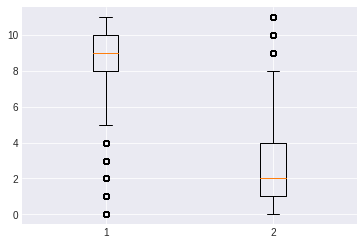

In [114]:
plt.boxplot([arr_test_win,arr_test_lose])
plt.savefig('Hypothesis_Test_Box_Plot.png')

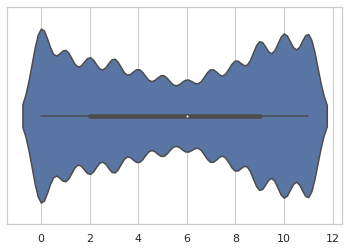

In [115]:
import seaborn as sn

sn.set(style="whitegrid")
ax = sn.violinplot([arr_test_win,arr_test_lose])
plt.savefig('Violin_Box_Plot.png')

In [116]:
Towers3.tail(50)

,Won,Towers_Taken
51440,False,1
51441,False,4
51442,True,9
51443,False,1
51444,True,6
51445,False,5
51446,True,11
51447,False,0
51448,True,4
51449,True,11


In [117]:
Team2_datan.columns

Index(['Game_ID', 'Creation_Time', 'Game_Duration', 'Season_ID', 'Team_Won',
       'First_Blood', 'First_Tower', 'First_Inhibitor', 'First_Baron',
       'First_Dragon', 'First_Rift_Herald', 'Team1_Champion1_ID',
       'TEAM1_CHAMPION1', 'TEAM1_CHAMPION1_SUMMONER_SPELL1',
       'TEAM1_CHAMPION1_SUMMONER_SPELL2', 'Team1_Champion2_ID',
       'TEAM1_CHAMPION2', 'TEAM1_CHAMPION2_SUMMONER_SPELL1',
       'TEAM1_CHAMPION2_SUMMONER_SPELL2', 'Team1_Champion3_ID',
       'TEAM1_CHAMPION3', 'TEAM1_CHAMPION3_SUMMONER_SPELL1',
       'TEAM1_CHAMPION3_SUMMONER_SPELL2', 'Team1_Champion4_ID',
       'TEAM1_CHAMPION4', 'TEAM1_CHAMPION4_SUMMONER_SPELL1',
       'TEAM1_CHAMPION4_SUMMONER_SPELL2', 'Team1_Champion5_ID',
       'TEAM1_CHAMPION5', 'TEAM1_CHAMPION5_SUMMONER_SPELL1',
       'TEAM1_CHAMPION5_SUMMONER_SPELL2', 'Team1_Towers_Taken',
       'Team1_Inibitors_Taken', 'Team1_Barons_Taken', 'Team1_Dragon_Kills',
       'Team1_RiftHerald_Kills', 'TEAM_1_banned_champion1',
       'TEAM1_BANNED_CHAM

In [118]:
Champions_TEAM1 = ['TEAM1_CHAMPION1','TEAM1_CHAMPION2','TEAM1_CHAMPION3','TEAM1_CHAMPION4','TEAM1_CHAMPION5']

In [119]:
Champions_Banned_TEAM1 =['TEAM1_BANNED_CHAMP1','TEAM1_BANNED_CHAMP2',
            'TEAM1_BANNED_CHAMP3','TEAM1_BANNED_CHAMP4','TEAM1_BANNED_CHAMP5']

In [120]:
Champions_TEAM2 = ['TEAM2_CHAMPION1','TEAM2_CHAMPION2','TEAM2_CHAMPION3','TEAM2_CHAMPION4','TEAM2_CHAMPION5']

In [121]:
Champions_Banned_TEAM2 = ['TEAM2_BANNED_CHAMP1','TEAM2_BANNED_CHAMP2','TEAM2_BANNED_CHAMP3','TEAM2_BANNED_CHAMP4',
            'TEAM2_BANNED_CHAMP5']

In [122]:
Team2_datan[['TEAM1_CHAMPION1','TEAM1_CHAMPION2','TEAM1_CHAMPION3','TEAM1_CHAMPION4','TEAM1_CHAMPION5',
            'Team1_Towers_Taken','Team1_Inibitors_Taken','TEAM1_BANNED_CHAMP1','TEAM1_BANNED_CHAMP2',
            'TEAM1_BANNED_CHAMP3','TEAM1_BANNED_CHAMP4','TEAM1_BANNED_CHAMP5','TEAM2_CHAMPION1','TEAM2_CHAMPION2',
            'TEAM2_CHAMPION3','TEAM2_CHAMPION4','TEAM2_CHAMPION5','Team2_Towers_Taken','Team2_Inibitors_Taken',
            'TEAM2_BANNED_CHAMP1','TEAM2_BANNED_CHAMP2','TEAM2_BANNED_CHAMP3','TEAM2_BANNED_CHAMP4',
            'TEAM2_BANNED_CHAMP5']]

,TEAM1_CHAMPION1,TEAM1_CHAMPION2,TEAM1_CHAMPION3,TEAM1_CHAMPION4,TEAM1_CHAMPION5,Team1_Towers_Taken,Team1_Inibitors_Taken,TEAM1_BANNED_CHAMP1,TEAM1_BANNED_CHAMP2,TEAM1_BANNED_CHAMP3,...,TEAM2_CHAMPION3,TEAM2_CHAMPION4,TEAM2_CHAMPION5,Team2_Towers_Taken,Team2_Inibitors_Taken,TEAM2_BANNED_CHAMP1,TEAM2_BANNED_CHAMP2,TEAM2_BANNED_CHAMP3,TEAM2_BANNED_CHAMP4,TEAM2_BANNED_CHAMP5
8,Nautilus,Maokai,Tristana,Nami,Velkoz,0,0,Zac,Lulu,Chogath,...,Lux,Kayn,Brand,8,1,Evelynn,Caitlyn,Blitzcrank,Yasuo,Janna
9,Ivern,MasterYi,Nasus,Kalista,Diana,10,1,Chogath,Zed,Kayn,...,Heimerdinger,Lux,Garen,8,3,LeeSin,Kayn,Akali,Vayne,Blitzcrank
10,Lux,Lucian,Zyra,Maokai,Nautilus,0,0,Fiora,Janna,Chogath,...,Fizz,Tristana,Leona,10,2,Warwick,Heimerdinger,Darius,JarvanIV,Thresh
14,Janna,Ahri,Xayah,Riven,Kayn,8,1,Zed,MasterYi,Annie,...,Syndra,Jax,Twitch,9,2,Chogath,Vayne,Jhin,Blitzcrank,Draven
16,Vayne,Janna,Azir,XinZhao,Riven,3,0,Ornn,Darius,Galio,...,Jhin,Soraka,Mordekaiser,9,3,Tristana,Syndra,Blitzcrank,Illaoi,Twitch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51484,Varus,Brand,Leblanc,Shaco,Chogath,5,1,Illaoi,Blitzcrank,LeeSin,...,MasterYi,Akali,Kayn,11,5,Maokai,MissFortune,Yasuo,Blitzcrank,Renekton
51485,Warwick,Kalista,Talon,Bard,LeeSin,2,0,Fiora,Tristana,MasterYi,...,Vayne,Janna,Gragas,10,2,Katarina,NaN,Malzahar,Zed,Yasuo
51486,Malzahar,Amumu,Chogath,Thresh,Tristana,5,4,Yasuo,Camille,Darius,...,Leona,Nasus,Veigar,11,7,Yasuo,Katarina,Draven,Zac,Fizz
51487,Kayn,Tristana,Bard,Ezreal,Rumble,0,0,Zed,Chogath,Jax,...,Rammus,Karma,Lux,10,2,Sejuani,Darius,Blitzcrank,MasterYi,Yasuo


In [123]:
for a in Champions_TEAM2:
    td = Team2_datan[a].value_counts()
td

Tristana    622
Thresh      614
Kayn        519
Vayne       519
Janna       462
           ... 
Kindred      44
Ryze         44
Udyr         42
Aatrox       40
Skarner      22
Name: TEAM2_CHAMPION5, Length: 138, dtype: int64

In [124]:
for b in Champions_Banned_TEAM2:
    tt = Team2_datan[b].value_counts()
tt

Yasuo      1564
Zed        1307
Chogath    1275
Janna      1181
Darius     1072
           ... 
Kindred       5
Skarner       4
Varus         4
Udyr          3
Sion          2
Name: TEAM2_BANNED_CHAMP5, Length: 138, dtype: int64

In [125]:
for aa in Champions_TEAM1:
    tdd = Team1_datan[aa].value_counts()
tdd

Tristana    665
Thresh      591
Janna       539
Vayne       529
Kayn        514
           ... 
Ryze         48
Ivern        48
Karthus      47
Aatrox       35
Skarner      28
Name: TEAM1_CHAMPION5, Length: 138, dtype: int64

In [126]:
for bb in Champions_Banned_TEAM1:
    ttt = Team1_datan[bb].value_counts()
ttt

Yasuo      1734
Zed        1355
Chogath    1292
Darius     1136
Draven     1060
           ... 
Kindred       5
Skarner       5
Varus         4
Udyr          4
Ryze          3
Name: TEAM1_BANNED_CHAMP5, Length: 138, dtype: int64

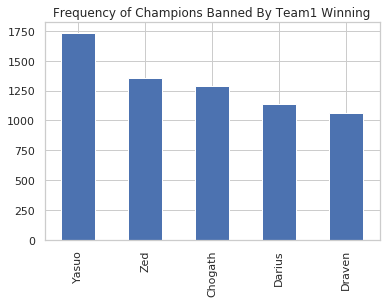

In [127]:
ttt[:5].plot.bar()
plt.title('Frequency of Champions Banned By Team1 Winning')
plt.savefig('Frequency of Champions Banned By Team1 Winning.png')

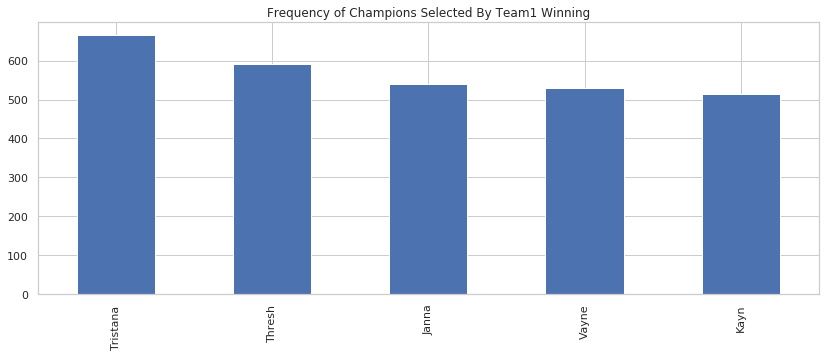

In [147]:
f, ax = plt.subplots(figsize=(14,5))
tdd[:5].plot.bar()
plt.title('Frequency of Champions Selected By Team1 Winning')
plt.savefig('Frequency of Champions Selected By Team1 Winning.png')

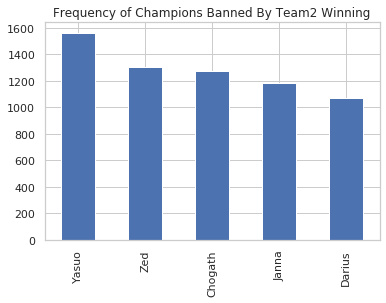

In [129]:
tt[:5].plot.bar()
plt.title('Frequency of Champions Banned By Team2 Winning')
plt.savefig('Frequency of Champions Banned By Team2 Winning.png')

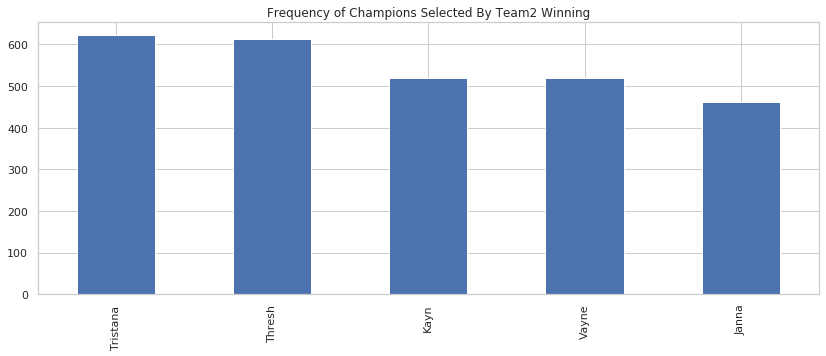

In [146]:
f, ax = plt.subplots(figsize=(14,5))
td[:5].plot.bar()
plt.title('Frequency of Champions Selected By Team2 Winning')
plt.savefig('Frequency_of_Champions_Selected_By_Team2_Winning.png')